In [1]:
# Imports
import os

import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Set root Dir for the project.
ROOT_DIR = "/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/"
RESULTS_DIR = ROOT_DIR + "Priors/"

# Dataset folder
PING_DATA = "/Volumes/T7/PING/TabularData/"
BCP_DATA = ROOT_DIR + "/BCP/"
BANDA_DATA = "/Volumes/T7/CCPM/BANDA/BANDARelease1.1/"
GESTE_DATA = "/Volumes/T7/CCPM/GESTE/"
ABCD_DATA = "/Volumes/T7/CCPM/ABCD/Release_5.1/abcd-data-release-5.1/"
MYRNA_DATA = "/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/"

# Create a directory for the results if it doesn't exist
if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)

In [3]:
# Fetch Harding font.
font_files = []
for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if "Harding".lower() in fontpath.lower():
        font_files.append(fontpath)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Set Harding font.
plt.rcParams['font.family'] = 'Harding Text Web'

# Set the Set2 color palette as an iterable.
cmap = sns.color_palette("Set2", 8)

In [4]:
# Load up all priors dataframe.
abcd_df = pd.read_csv(RESULTS_DIR + "ABCD_priors.csv")
banda_df = pd.read_csv(RESULTS_DIR + "BANDA_priors.csv")
bcp_df = pd.read_csv(RESULTS_DIR + "BCP_priors.csv")
geste_df = pd.read_csv(RESULTS_DIR + "GESTE_priors.csv")
myrna_df = pd.read_csv(RESULTS_DIR + "MYRNA_priors.csv")
ping_df = pd.read_csv(RESULTS_DIR + "PING_priors.csv")

# Load up their demographics data.
abcd_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/ABCD_demographics.csv")
banda_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/BANDA_demographics.csv")
bcp_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/BCP_demographics.csv")
geste_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/GESTE_demographics.csv")
myrna_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/MYRNA_demographics.csv")
ping_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/PING_demographics.csv")

# Load up BCP demographics data.
#bcp_demo = pd.read_csv(ROOT_DIR + "/BCP/ndar_subject01.txt", sep="\t")
#bcp_demo.drop(0, axis=0, inplace=True)

# Keep only relevant columns.
#bcp_demo = bcp_demo[["src_subject_id", "sex", "interview_age"]]
#bcp_demo.loc[:, "session_id"] = bcp_demo["interview_age"].apply(lambda x: f"ses-{int(x)}mo")
#bcp_demo = bcp_demo.rename(columns={"src_subject_id": "subject_id", "interview_age": "age"})
#bcp_demo.loc[:, "age"] = bcp_demo["age"].astype(float) / 12  # Convert age to years.
#bcp_demo.loc[:, "subject_id"] = "sub-" + bcp_demo["subject_id"].astype(str)
#bcp_demo = bcp_demo[["subject_id", "session_id", "sex", "age"]]
#bcp_demo.drop_duplicates(inplace=True)

# For rows where age is not available, get it from the session id.
#bcp_demo.loc[bcp_demo['age'].isnull(), 'age'] = bcp_demo['session_id'].str.extract('(\d+)').astype(int) / 12

# Individually append sex and age to the priors df.
abcd_df = abcd_df.merge(abcd_demo[['subject_id', 'sex', 'age', 'cohort']], on='subject_id', how='left')
banda_df = banda_df.merge(banda_demo[['subject_id', 'sex', 'age', 'cohort']], on='subject_id', how='left')
bcp_df = bcp_df.merge(bcp_demo[['subject_id', 'session_id', 'sex', 'age', 'cohort']], on=['subject_id', 'session_id'], how='left')
bcp_df.dropna(subset=['sex', 'age'], inplace=True)
geste_df = geste_df.merge(geste_demo[['subject_id', 'sex', 'age', 'cohort']], on='subject_id', how='left')
myrna_df = myrna_df.merge(myrna_demo[['subject_id', 'sex', 'age', 'cohort']], on='subject_id', how='left')
myrna_df.dropna(subset=['sex', 'age'], inplace=True)
ping_df = ping_df.merge(ping_demo[['subject_id', 'sex', 'age', 'cohort']], on='subject_id', how='left')
# Drop participants with age = 0 in PING.
ping_df = ping_df[ping_df['age'] > 0]


In [5]:
# Stacked all priors dataframes.
all_priors = pd.concat([abcd_df, banda_df, bcp_df, geste_df, myrna_df, ping_df], ignore_index=True)

# Save the combined dataframe.
all_priors.to_csv(RESULTS_DIR + "All_priors.csv", index=False)

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_98953/1003180279.py:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="ad_mean", hue="sex", ax=ax[0, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_98953/1003180279.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="rd_mean", hue="sex", ax=ax[0, 1], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_98953/1003180279.py:18: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="sex", ax=ax[1, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_98953/1003180279.py:25: UserWarning: The palette list has more values (8) than nee

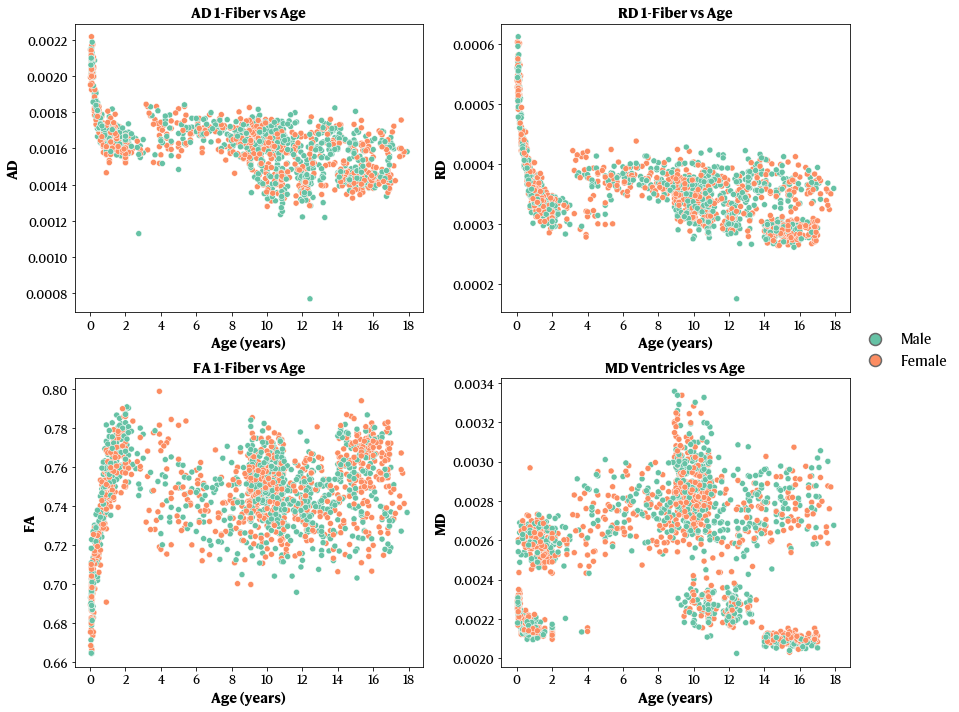

In [6]:
# Generate 4 subplots, one for ad_1fiber, rd_1fiber, fa_1fiber, and md_ventricles against age with sex as a hue.
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=all_priors, x="age", y="ad_mean", hue="sex", ax=ax[0, 0], palette=cmap, legend=False)
ax[0, 0].set_title("AD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 0].set_ylabel("AD", fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="rd_mean", hue="sex", ax=ax[0, 1], palette=cmap, legend=False)
ax[0, 1].set_title("RD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 1].set_ylabel("RD", fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 1].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="sex", ax=ax[1, 0], palette=cmap, legend=False)
ax[1, 0].set_title("FA 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[1, 0].set_ylabel("FA", fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="md_mean", hue="sex", ax=ax[1, 1], palette=cmap, legend=False)
ax[1, 1].set_title("MD Ventricles vs Age", fontsize=14, fontweight='bold')
ax[1, 1].set_ylabel("MD", fontsize=14, fontweight='bold')
ax[1, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 1].tick_params(axis='both', which='major', labelsize=12)

handles = [plt.Line2D([0], [0], color=cmap[0], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[1], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey')]
labels = ["Male", "Female"]
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(1.05, 0.55),
           ncol=1, fontsize=14, frameon=False)


plt.tight_layout()
plt.show()

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1938488009.py:4: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="ad_1fiber", hue="cohort", ax=ax[0, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1938488009.py:11: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="rd_1fiber", hue="cohort", ax=ax[0, 1], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1938488009.py:18: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="cohort", ax=ax[1, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1938488009.py:25: UserWarning: The palette list has more values

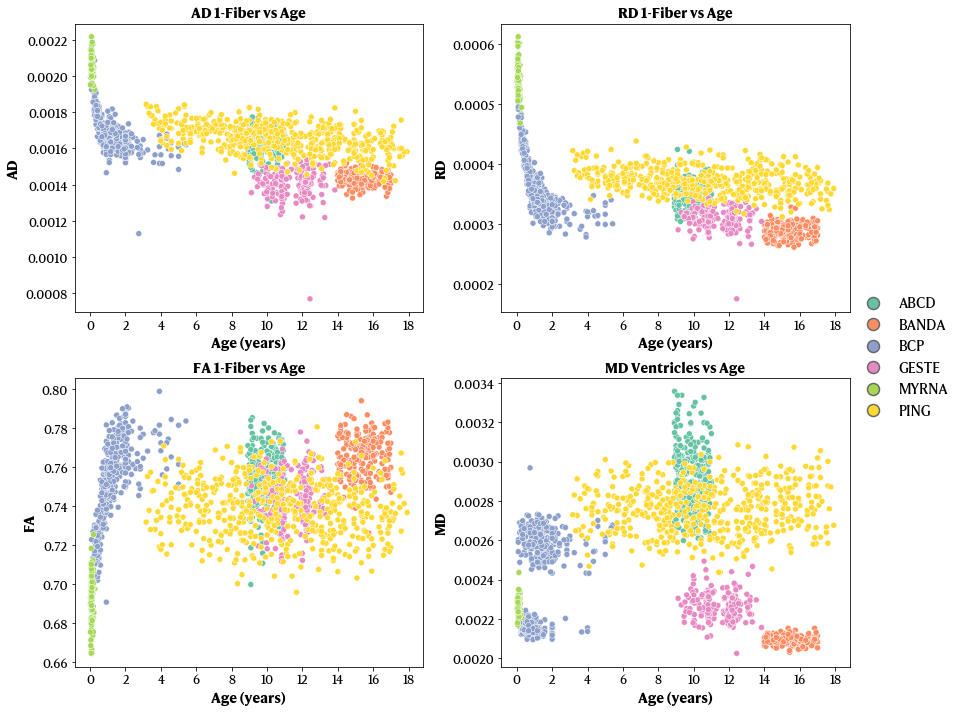

In [7]:
# Same plots, but with cohort as hue.
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=all_priors, x="age", y="ad_1fiber", hue="cohort", ax=ax[0, 0], palette=cmap, legend=False)
ax[0, 0].set_title("AD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 0].set_ylabel("AD", fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="rd_1fiber", hue="cohort", ax=ax[0, 1], palette=cmap, legend=False)
ax[0, 1].set_title("RD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 1].set_ylabel("RD", fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 1].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="cohort", ax=ax[1, 0], palette=cmap, legend=False)
ax[1, 0].set_title("FA 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[1, 0].set_ylabel("FA", fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="md_ventricle", hue="cohort", ax=ax[1, 1], palette=cmap, legend=False)
ax[1, 1].set_title("MD Ventricles vs Age", fontsize=14, fontweight='bold')
ax[1, 1].set_ylabel("MD", fontsize=14, fontweight='bold')
ax[1, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Do a single legend for all plots
# Add a global legend highlighting the colors for the diagnoses with a border.
handles = [plt.Line2D([0], [0], color=cmap[0], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[1], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[2], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[3], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[4], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[5], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey')]
labels = ["ABCD", "BANDA", "BCP", "GESTE", "MYRNA", "PING"]
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(1.05, 0.6),
           ncol=1, fontsize=14, frameon=False)

plt.tight_layout()
plt.show()

In [10]:
# Run the GAMLSS model fitting and plotting script with command line arguments using subprocess.
# ** This is a long running process, go get a coffee. **
import subprocess

# Make sure Rscript is installed and available in your PATH.
# You can check this by running `which Rscript` in your terminal.

# Run GAMLSS fitting (stdout and stderr are saved to log files per metric).
metrics = ["fa_1fiber", "ad_mean", "rd_mean", "md_mean", "rd_max", "rd_min"]

for metric in metrics:
    log_file = f"{RESULTS_DIR}gamlss_{metric}.log"
    print(f"Running GAMLSS for {metric}, logging to {log_file}")
    
    with open(log_file, 'w') as log:
        result = subprocess.run(
            ["Rscript", "../scripts/gamlss.R", "--input", RESULTS_DIR + "All_priors.csv", 
             "--metric", metric, "--output", RESULTS_DIR],
            stdout=log,
            stderr=subprocess.STDOUT
        )
    
    if result.returncode != 0:
        print(f"Warning: {metric} completed with return code {result.returncode}")
    else:
        print(f"Completed {metric}")

print("All GAMLSS runs completed. Check log files for details.")

Running GAMLSS for fa_1fiber, logging to /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/gamlss_fa_1fiber.log
Completed fa_1fiber
Running GAMLSS for ad_mean, logging to /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/gamlss_ad_mean.log
Completed ad_mean
Running GAMLSS for rd_mean, logging to /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/gamlss_rd_mean.log
Completed rd_mean
Running GAMLSS for md_mean, logging to /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/gamlss_md_mean.log
Completed md_mean
Running GAMLSS for rd_max, logging to /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/gamlss_rd_max.log
Completed rd_max
Running GAMLSS for rd_min, logging to /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/gamlss_rd_min.log
Completed rd_min
All GAMLSS runs completed. Check log files for details.


In [11]:
# Load back the GAMLSS centile data and plot them with the original data.
fa_centiles = pd.read_csv(RESULTS_DIR + "fa_1fiber_centiles_by_age.csv")
ad_centiles = pd.read_csv(RESULTS_DIR + "ad_mean_centiles_by_age.csv")
rd_centiles = pd.read_csv(RESULTS_DIR + "rd_mean_centiles_by_age.csv")
md_centiles = pd.read_csv(RESULTS_DIR + "md_mean_centiles_by_age.csv")
rd_min_centiles = pd.read_csv(RESULTS_DIR + "rd_min_centiles_by_age.csv")
rd_max_centiles = pd.read_csv(RESULTS_DIR + "rd_max_centiles_by_age.csv")

# For each values in the prob column, create a column prob_value so that the resulting df is in the wide format
# with columns age, P3, P10, P25, P50, P75, P90, P97 (all PX columns contain metric values for the corresponding percentiles).
fa_centiles = fa_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
ad_centiles = ad_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
rd_centiles = rd_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
md_centiles = md_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
rd_min_centiles = rd_min_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
rd_max_centiles = rd_max_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
rd_centiles.drop(0, axis=0, inplace=True)  # Drop the first row which contains NA values.

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_98953/2172653266.py:5: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="ad_mean", hue="cohort", ax=ax[0, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_98953/2172653266.py:15: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="rd_mean", hue="cohort", ax=ax[0, 1], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_98953/2172653266.py:26: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="cohort", ax=ax[1, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_98953/2172653266.py:36: UserWarning: The palette list has more values (8)

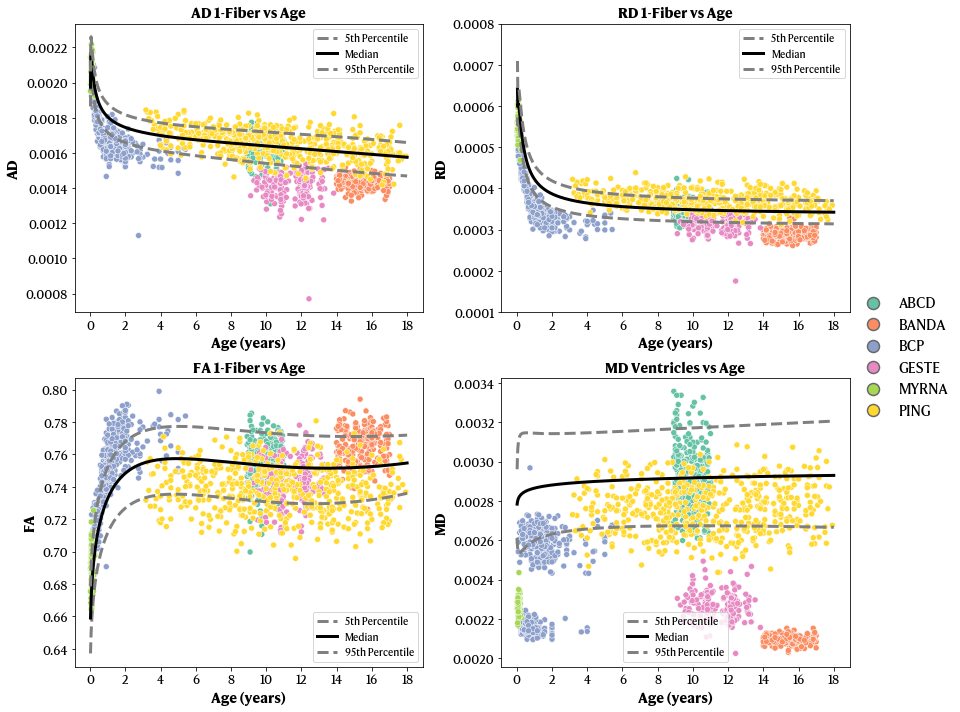

In [12]:
# Plot the centiles on top of the scatterplots.
## Same plots, but with cohort as hue.
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=all_priors, x="age", y="ad_mean", hue="cohort", ax=ax[0, 0], palette=cmap, legend=False)
sns.lineplot(data=ad_centiles, x="age", y=0.05, ax=ax[0, 0], color='grey', linestyle='--', linewidth=3, label='5th Percentile')
sns.lineplot(data=ad_centiles, x="age", y=0.5, ax=ax[0, 0], color='black', linestyle='-', linewidth=3, label='Median')
sns.lineplot(data=ad_centiles, x="age", y=0.95, ax=ax[0, 0], color='grey', linestyle='--', linewidth=3, label='95th Percentile')
ax[0, 0].set_title("AD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 0].set_ylabel("AD", fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="rd_mean", hue="cohort", ax=ax[0, 1], palette=cmap, legend=False)
sns.lineplot(data=rd_centiles, x="age", y=0.05, ax=ax[0, 1], color='grey', linestyle='--', linewidth=3, label='5th Percentile')
sns.lineplot(data=rd_centiles, x="age", y=0.5, ax=ax[0, 1], color='black', linestyle='-', linewidth=3, label='Median')
sns.lineplot(data=rd_centiles, x="age", y=0.95, ax=ax[0, 1], color='grey', linestyle='--', linewidth=3, label='95th Percentile')
ax[0, 1].set_title("RD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 1].set_ylabel("RD", fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 1].tick_params(axis='both', which='major', labelsize=12)
ax[0, 1].set_ylim(0.0001, 0.0008)

sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="cohort", ax=ax[1, 0], palette=cmap, legend=False)
sns.lineplot(data=fa_centiles, x="age", y=0.05, ax=ax[1, 0], color='grey', linestyle='--', linewidth=3, label='5th Percentile')
sns.lineplot(data=fa_centiles, x="age", y=0.5, ax=ax[1, 0], color='black', linestyle='-', linewidth=3, label='Median')
sns.lineplot(data=fa_centiles, x="age", y=0.95, ax=ax[1, 0], color='grey', linestyle='--', linewidth=3, label='95th Percentile')
ax[1, 0].set_title("FA 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[1, 0].set_ylabel("FA", fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="md_mean", hue="cohort", ax=ax[1, 1], palette=cmap, legend=False)
sns.lineplot(data=md_centiles, x="age", y=0.05, ax=ax[1, 1], color='grey', linestyle='--', linewidth=3, label='5th Percentile')
sns.lineplot(data=md_centiles, x="age", y=0.5, ax=ax[1, 1], color='black', linestyle='-', linewidth=3, label='Median')
sns.lineplot(data=md_centiles, x="age", y=0.95, ax=ax[1, 1], color='grey', linestyle='--', linewidth=3, label='95th Percentile')
ax[1, 1].set_title("MD Ventricles vs Age", fontsize=14, fontweight='bold')
ax[1, 1].set_ylabel("MD", fontsize=14, fontweight='bold')
ax[1, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Do a single legend for all plots
# Add a global legend highlighting the colors for the diagnoses with a border.
handles = [plt.Line2D([0], [0], color=cmap[0], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[1], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[2], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[3], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[4], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[5], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey')]
labels = ["ABCD", "BANDA", "BCP", "GESTE", "MYRNA", "PING"]
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(1.05, 0.6),
           ncol=1, fontsize=14, frameon=False)

plt.tight_layout()
plt.show()

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_98953/1086132208.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_priors, x="cohort", y="age", palette=cohort_cmap, ax=ax01,
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_98953/1086132208.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=all_priors, x="cohort", y="age", palette=cohort_cmap, ax=ax01,
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_98953/1086132208.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax01.set_xticklabels(["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"], rotation=45, ha=

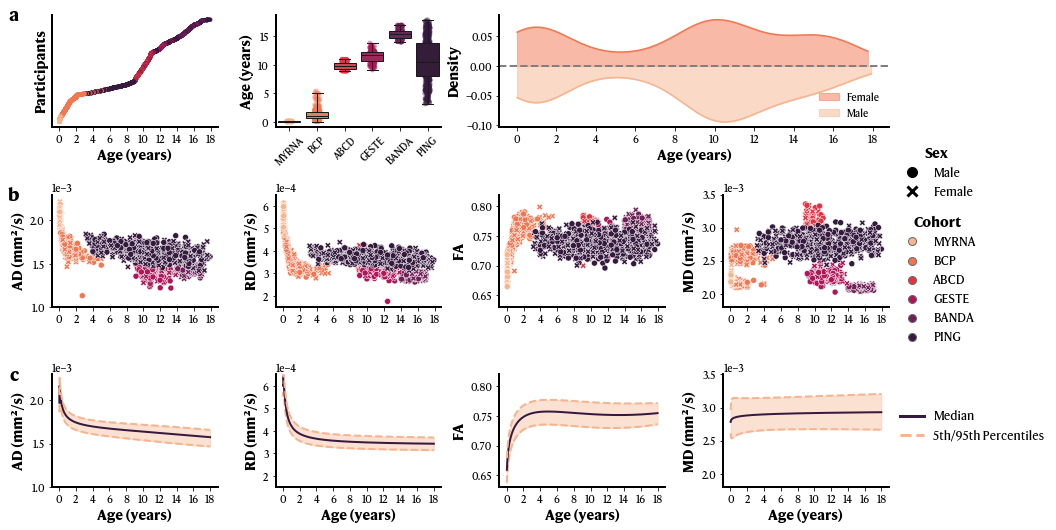

In [13]:
# Create a GridSpec layout: top row has a joint-like scatter (ax00), a boxplot (ax01),
# and a merged density axis spanning the last two columns (ax02). The bottom three rows
# contain the priors plots (sex scatter, cohort scatter, and centile curves) — reused from the
# original implementation.
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde

fig = plt.figure(figsize=(15, 12))
# 4 rows x 4 cols grid; top row will use cols 0,1 and cols 2:4 merged
gs = fig.add_gridspec(nrows=4, ncols=4, height_ratios=[1, 1, 1, 1], hspace=0.6, wspace=0.35)

# Top row axes
ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax02 = fig.add_subplot(gs[0, 2:4])  # merged density plot spanning two columns

# Bottom three rows: 2 x 4 axes (rows 1..2)
axes = [[fig.add_subplot(gs[r, c]) for c in range(4)] for r in range(1, 3)]

rocket_cmap = sns.color_palette("rocket_r", 6)

# Color maps (reuse existing small palettes)
# sex_cmap = [cmap[2], cmap[3]]  # two colors for sex
cohort_cmap = [rocket_cmap[0], rocket_cmap[1], rocket_cmap[2], rocket_cmap[3], rocket_cmap[4], rocket_cmap[5]]  # six cohorts

# --- Top-left: joint-like scatter (age vs FA) ---
# Use stripplot to create a scatter-like plot with jitter.
all_priors["index"] = all_priors.index.astype(str)
sns.scatterplot(data=all_priors.sort_values(by="age", ascending=False), x="age", y="index", hue="cohort",
                palette=cohort_cmap, ax=ax00, legend=False, alpha=1, edgecolor=None, size=8,
                hue_order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"])
#ax00.set_title("FA (age vs FA) — scatter by sex", fontsize=14, fontweight='bold')
ax00.set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax00.set_ylabel("Participants", fontsize=14, fontweight='bold')
ax00.set_yticks([])  # Hide y-ticks for clarity
ax00.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax00.tick_params(axis='both', which='major', labelsize=10)
ax00.spines[["top", "right"]].set_visible(False)
ax00.spines[["left", "bottom"]].set_linewidth(2)

# --- Top-second: boxplot of FA by sex ---
sns.boxplot(data=all_priors, x="cohort", y="age", palette=cohort_cmap, ax=ax01,
            order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"], zorder=2, whis=3,
            fliersize=0)
sns.stripplot(data=all_priors, x="cohort", y="age", palette=cohort_cmap, ax=ax01,
              order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"], alpha=0.4, zorder=1)
ax01.set_xlabel("")
ax01.set_ylabel("Age (years)", fontsize=14, fontweight='bold')
ax01.tick_params(axis='both', which='major', labelsize=10)
ax01.set_xticklabels(["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"], rotation=45, ha='center')
ax01.spines[["top", "right"]].set_visible(False)
ax01.spines[["left", "bottom"]].set_linewidth(2)

# --- Top merged density: KDEs of FA per cohort ---
kde_male = gaussian_kde(all_priors[all_priors["sex"] == "M"]["age"], bw_method=0.3)
x_male = np.linspace(all_priors[all_priors["sex"] == "M"]["age"].min(), all_priors[all_priors["sex"] == "M"]["age"].max(), 1000)
y_male = kde_male(x_male)
kde_female = gaussian_kde(all_priors[all_priors["sex"] == "F"]["age"], bw_method=0.3)
x_female = np.linspace(all_priors[all_priors["sex"] == "F"]["age"].min(), all_priors[all_priors["sex"] == "F"]["age"].max(), 1000)
y_female = kde_female(x_female)
ax02.fill_between(x_female, 0, y_female, color=rocket_cmap[1], alpha=0.5, label="Female")
ax02.fill_between(x_male, -y_male, 0, color=rocket_cmap[0], alpha=0.5, label="Male")
sns.lineplot(x=x_female, y=y_female, color=rocket_cmap[1], ax=ax02)
sns.lineplot(x=x_male, y=-y_male, color=rocket_cmap[0], ax=ax02)
ax02.axhline(0, color="grey", linewidth=2, linestyle='--')
ax02.set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax02.set_ylabel("Density", fontsize=14, fontweight='bold')
ax02.legend(fontsize=10, frameon=False)
ax02.tick_params(axis='both', which='major', labelsize=10)
ax02.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax02.spines[["top", "right"]].set_visible(False)
ax02.spines[["left", "bottom"]].set_linewidth(2)



# Row 2 (index 1 in axes): cohort-labeled scatterplots
sns.scatterplot(data=all_priors, x="age", y="ad_mean", ax=axes[0][0], hue="cohort", style="sex", palette=cohort_cmap, legend=False,
                hue_order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"])
axes[0][0].set_ylim(0.0010, 0.0023)
axes[0][0].set_ylabel("AD (mm²/s)", fontsize=14, fontweight='bold')
axes[0][0].set_xlabel("")
axes[0][0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[0][0].tick_params(axis='both', which='major', labelsize=10)

sns.scatterplot(data=all_priors, x="age", y="rd_mean", ax=axes[0][1], hue="cohort", style="sex", palette=cohort_cmap, legend=False,
                hue_order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"])
axes[0][1].set_ylim(0.00015, 0.00065)
axes[0][1].set_ylabel("RD (mm²/s)", fontsize=14, fontweight='bold')
axes[0][1].set_xlabel("")
axes[0][1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[0][1].tick_params(axis='both', which='major', labelsize=10)

sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", ax=axes[0][2], hue="cohort", style="sex", palette=cohort_cmap, legend=False,
                hue_order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"])
axes[0][2].set_ylim(0.63, 0.82)
axes[0][2].set_ylabel("FA", fontsize=14, fontweight='bold')
axes[0][2].set_xlabel("")
axes[0][2].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[0][2].tick_params(axis='both', which='major', labelsize=10)

sns.scatterplot(data=all_priors, x="age", y="md_mean", ax=axes[0][3], hue="cohort", style="sex", palette=cohort_cmap, legend=False,
                hue_order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"])
axes[0][3].set_ylim(0.0018, 0.0035)
axes[0][3].set_ylabel("MD (mm²/s)", fontsize=14, fontweight='bold')
axes[0][3].set_xlabel("")
axes[0][3].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[0][3].tick_params(axis='both', which='major', labelsize=10)

# Row 3 (index 2 in axes): centile curves with fills
sns.lineplot(data=ad_centiles, x="age", y=0.05, ax=axes[1][0], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
sns.lineplot(data=ad_centiles, x="age", y=0.5, ax=axes[1][0], color=rocket_cmap[5], linestyle='-', linewidth=2, legend=False)
sns.lineplot(data=ad_centiles, x="age", y=0.95, ax=axes[1][0], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
axes[1][0].set_ylim(0.0010, 0.0023)
axes[1][0].fill_between(ad_centiles['age'], ad_centiles[0.05], ad_centiles[0.95], color=rocket_cmap[0], alpha=0.4, zorder=-1)
axes[1][0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
axes[1][0].set_ylabel("AD (mm²/s)", fontsize=14, fontweight='bold')
axes[1][0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[1][0].tick_params(axis='both', which='major', labelsize=10)

sns.lineplot(data=rd_centiles, x="age", y=0.05, ax=axes[1][1], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
sns.lineplot(data=rd_centiles, x="age", y=0.5, ax=axes[1][1], color=rocket_cmap[5], linestyle='-', linewidth=2, legend=False)
sns.lineplot(data=rd_centiles, x="age", y=0.95, ax=axes[1][1], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
axes[1][1].set_ylim(0.00015, 0.00065)
axes[1][1].fill_between(rd_centiles['age'], rd_centiles[0.05], rd_centiles[0.95], color=rocket_cmap[0], alpha=0.4, zorder=-1)
axes[1][1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
axes[1][1].set_ylabel("RD (mm²/s)", fontsize=14, fontweight='bold')
axes[1][1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[1][1].tick_params(axis='both', which='major', labelsize=10)

sns.lineplot(data=fa_centiles, x="age", y=0.05, ax=axes[1][2], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
sns.lineplot(data=fa_centiles, x="age", y=0.5, ax=axes[1][2], color=rocket_cmap[5], linestyle='-', linewidth=2, legend=False)
sns.lineplot(data=fa_centiles, x="age", y=0.95, ax=axes[1][2], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
axes[1][2].set_ylim(0.63, 0.82)
axes[1][2].fill_between(fa_centiles['age'], fa_centiles[0.05], fa_centiles[0.95], color=rocket_cmap[0], alpha=0.4, zorder=-1)
axes[1][2].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
axes[1][2].set_ylabel("FA", fontsize=14, fontweight='bold')
axes[1][2].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[1][2].tick_params(axis='both', which='major', labelsize=10)

sns.lineplot(data=md_centiles, x="age", y=0.05, ax=axes[1][3], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
sns.lineplot(data=md_centiles, x="age", y=0.5, ax=axes[1][3], color=rocket_cmap[5], linestyle='-', linewidth=2, legend=False)
sns.lineplot(data=md_centiles, x="age", y=0.95, ax=axes[1][3], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
axes[1][3].set_ylim(0.0018, 0.0035)
axes[1][3].fill_between(md_centiles['age'], md_centiles[0.05], md_centiles[0.95], color=rocket_cmap[0], alpha=0.4, zorder=-1)
axes[1][3].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
axes[1][3].set_ylabel("MD (mm²/s)", fontsize=14, fontweight='bold')
axes[1][3].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[1][3].tick_params(axis='both', which='major', labelsize=10)

# Styling: remove top/right spines and format small y-axis values
for row in axes:
    for a in row:
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines[["left", "bottom"]].set_linewidth(2)
        if a.get_ylim()[1] < 0.01:
            a.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))

# Global legends: sex and cohorts and centile labels (compact)
handles_sex = [plt.Line2D([0], [0], color="black", markersize=10, lw=0, marker="o", markeredgewidth=1, markeredgecolor='black'),
               plt.Line2D([0], [0], color="black", markersize=10, lw=0, marker="x", markeredgewidth=3, markeredgecolor='black')]
labels_sex = ["Male", "Female"]
fig.legend(handles_sex, labels_sex, loc="upper left", bbox_to_anchor=(0.90, 0.74), ncol=1, fontsize=12, frameon=False, title="Sex", title_fontproperties={'size': 14, 'weight': 'bold'})

handles_cohort = [plt.Line2D([0], [0], color=cohort_cmap[i], markersize=8, lw=0, marker="o", markeredgewidth=1, markeredgecolor='dimgrey') for i in range(len(cohort_cmap))]
labels_cohort = ["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"]
fig.legend(handles_cohort, labels_cohort, loc="upper left", bbox_to_anchor=(0.90, 0.66), ncol=1, fontsize=12, frameon=False, title="Cohort", title_fontproperties={'size': 14, 'weight': 'bold'})

handles_centile = [plt.Line2D([0], [0], color=rocket_cmap[5], markersize=8, lw=3, linestyle='-', label='Median'),
                     plt.Line2D([0], [0], color=rocket_cmap[0], markersize=8, lw=3, linestyle='--', label='5th/95th Percentiles')]
labels_centile = ["Median", "5th/95th Percentiles"]
fig.legend(handles_centile, labels_centile, loc="upper left", bbox_to_anchor=(0.90, 0.435), ncol=1, fontsize=12, frameon=False)

# Add a, b, c, d to each row for clarity (only a single label per row)
row_labels = ['a', 'b', 'c', 'd']
ax00.text(-0.2, 1.07, row_labels[0], transform=ax00.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
axes[0][0].text(-0.2, 1.07, row_labels[1], transform=axes[0][0].transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
axes[1][0].text(-0.2, 1.07, row_labels[2], transform=axes[1][0].transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

# Save figure
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(RESULTS_DIR + "combined_priors_toprow_grid.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


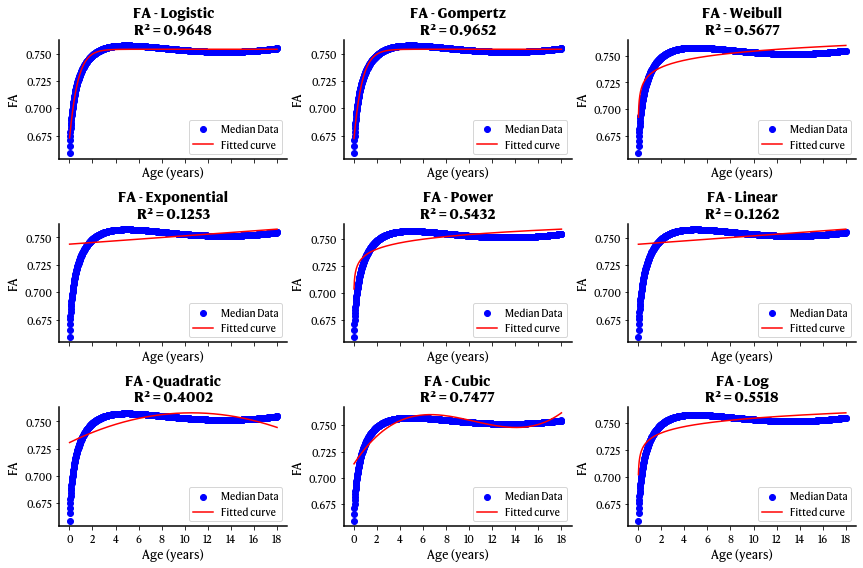

In [15]:
# Curves from the GAMLSS model requires too many info to predict a single value, so we should derive an equation based on the
# median values from the centile dataframes that could be predicted easily from age.
from scipy.optimize import curve_fit

def logistic_func(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))
def gompertz_func(x, a, b, c):
    return a * np.exp(-b * np.exp(-c * x))
def weibull_func(x, a, b, c):
    return a * (1 - np.exp(- (b * x) ** c))
def exponential_func(x, a, b):
    return a * np.exp(b * x)
def power_func(x, a, b):
    return a * np.power(x, b)
def linear_func(x, a, b):
    return a * x + b
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c
def cubic_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d
def log_func(x, a, b):
    return a * np.log(x) + b

# Fit each of the functions to the median data and see which one fits best (R^2)
def fit_and_plot(func, xdata, ydata, ax, title, metric):
    # Initial guess for the parameters
    if func == logistic_func:
        initial_guess = [max(ydata), 0.1, np.median(xdata)]
    elif func == gompertz_func:
        initial_guess = [max(ydata), 1, 0.05]
    elif func == weibull_func:
        initial_guess = [max(ydata), 0.05, 1]
    elif func == exponential_func:
        initial_guess = [min(ydata), 0.01]
    elif func == power_func:
        initial_guess = [min(ydata), 0.5]
    elif func == linear_func:
        initial_guess = [(max(ydata)-min(ydata))/(max(xdata)-min(xdata)), min(ydata)]
    elif func == quadratic_func:
        initial_guess = [1, 1, min(ydata)]
    elif func == cubic_func:
        initial_guess = [1, 1, 1, min(ydata)]
    elif func == log_func:
        initial_guess = [1, min(ydata)]

    # Fit the curve
    params, covariance = curve_fit(func, xdata, ydata, p0=initial_guess, maxfev=100000)

    # Generate fitted values
    yfit = func(xdata, *params)

    # Calculate R^2
    residuals = ydata - yfit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata - np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Plot original data and fitted curve
    ax.scatter(xdata, ydata, label='Median Data', color='blue')
    ax.plot(xdata, yfit, label='Fitted curve', color='red')
    ax.set_title(f"{title}\nR² = {r_squared:.4f}", fontsize=14, fontweight='bold')
    ax.set_xlabel("Age (years)", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    # If y-axis values are very small, use scientific notation
    if ax.get_ylim()[1] < 0.01:
        ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.legend()

    # Formatting stuff.
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[["left", "bottom"]].set_linewidth(1.5)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])

    return params, r_squared

# Prepare data
fa_xdata = fa_centiles['age']
fa_ydata = fa_centiles[0.5]
ad_xdata = ad_centiles['age']
ad_ydata = ad_centiles[0.5]
rd_xdata = rd_centiles['age']
rd_ydata = rd_centiles[0.5]
md_xdata = md_centiles['age']
md_ydata = md_centiles[0.5]
rd_min_xdata = rd_min_centiles['age']
rd_min_ydata = rd_min_centiles[0.5]
rd_max_xdata = rd_max_centiles['age']
rd_max_ydata = rd_max_centiles[0.5]

# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
# Fit and plot for each function only on fa metric (6 functions, 6 subplots)
functions = [logistic_func, gompertz_func, weibull_func, exponential_func, power_func, linear_func, quadratic_func, cubic_func, log_func]
function_names = ["Logistic", "Gompertz", "Weibull", "Exponential", "Power", "Linear", "Quadratic", "Cubic", "Log"]
fa_params = {}
fa_r2 = {}
for i, func in enumerate(functions):
    params, r2 = fit_and_plot(func, fa_xdata, fa_ydata, ax[i//3, i%3], f"FA - {function_names[i]}", "FA")
    fa_params[function_names[i]] = params
    fa_r2[function_names[i]] = r2


plt.tight_layout()
plt.savefig(ROOT_DIR + "Priors/FA_curve_approximations.png", dpi=300)

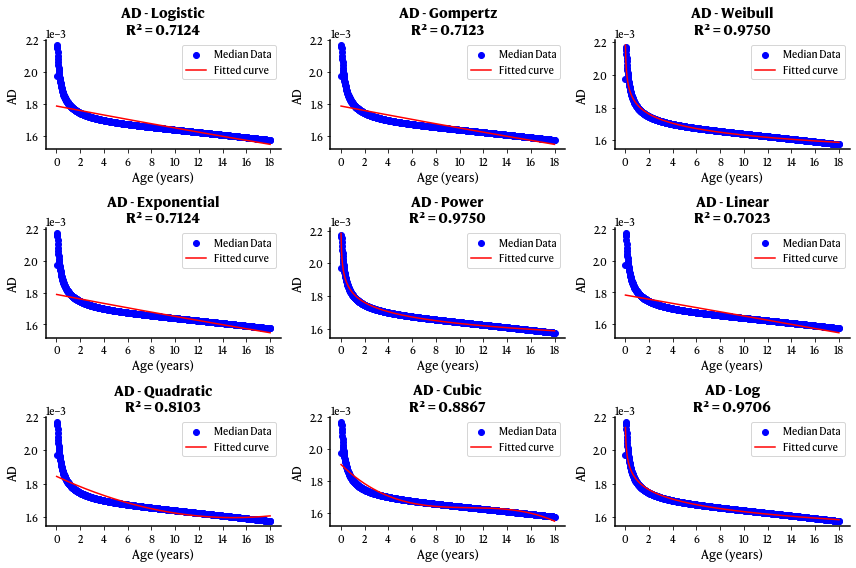

In [19]:
# Do the same thing for AD.
# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
# Fit and plot for each function only on ad metric (6 functions, 6 subplots)
functions = [logistic_func, gompertz_func, weibull_func, exponential_func, power_func, linear_func, quadratic_func, cubic_func, log_func]
function_names = ["Logistic", "Gompertz", "Weibull", "Exponential", "Power", "Linear", "Quadratic", "Cubic", "Log"]
ad_params = {}
ad_r2 = {}
for i, func in enumerate(functions):
    params, r2 = fit_and_plot(func, ad_xdata, ad_ydata, ax[i//3, i%3], f"AD - {function_names[i]}", "AD")
    ad_params[function_names[i]] = params
    ad_r2[function_names[i]] = r2


plt.tight_layout()
plt.savefig(ROOT_DIR + "Priors/AD_curve_approximations.png", dpi=300)

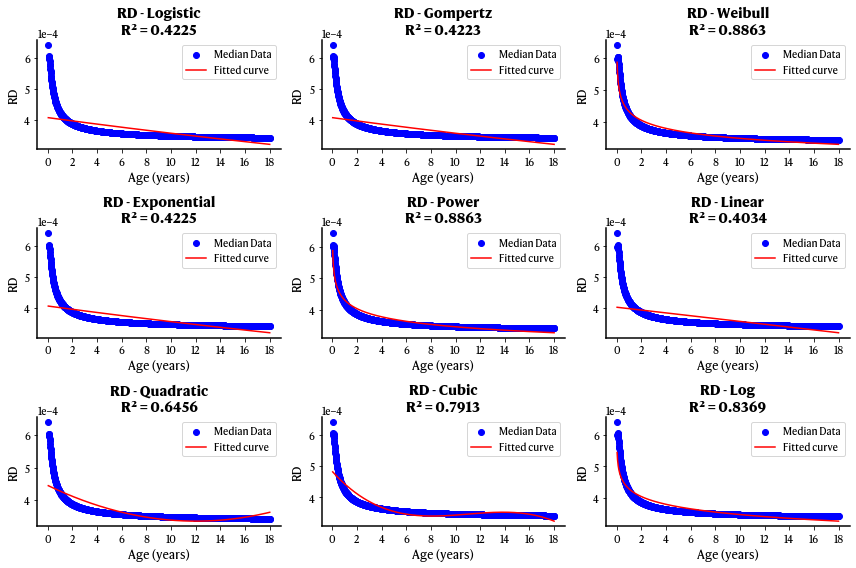

In [20]:
# Same thing for RD.
# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
# Fit and plot for each function only on rd metric (6 functions, 6 subplots
functions = [logistic_func, gompertz_func, weibull_func, exponential_func, power_func, linear_func, quadratic_func, cubic_func, log_func]
function_names = ["Logistic", "Gompertz", "Weibull", "Exponential", "Power", "Linear", "Quadratic", "Cubic", "Log"]
rd_params = {}
rd_r2 = {}
for i, func in enumerate(functions):
    params, r2 = fit_and_plot(func, rd_xdata, rd_ydata, ax[i//3, i%3], f"RD - {function_names[i]}", "RD")
    rd_params[function_names[i]] = params
    rd_r2[function_names[i]] = r2


plt.tight_layout()
plt.savefig(ROOT_DIR + "Priors/RD_curve_approximation.png", dpi=300)

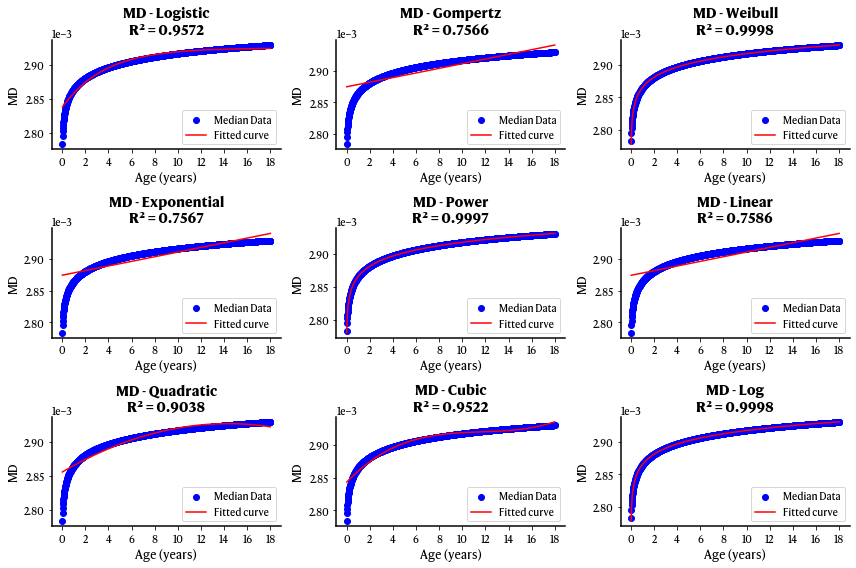

In [21]:
# Same thing for MD.
# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
# Fit and plot for each function only on md metric (6 functions, 6 subplots
functions = [logistic_func, gompertz_func, weibull_func, exponential_func, power_func, linear_func, quadratic_func, cubic_func, log_func]
function_names = ["Logistic", "Gompertz", "Weibull", "Exponential", "Power", "Linear", "Quadratic", "Cubic", "Log"]
md_params = {}
md_r2 = {}
for i, func in enumerate(functions):
    params, r2 = fit_and_plot(func, md_xdata, md_ydata, ax[i//3, i%3], f"MD - {function_names[i]}", "MD")
    md_params[function_names[i]] = params
    md_r2[function_names[i]] = r2

plt.tight_layout()
plt.savefig(ROOT_DIR + "Priors/MD_curve_approximation.png", dpi=300)

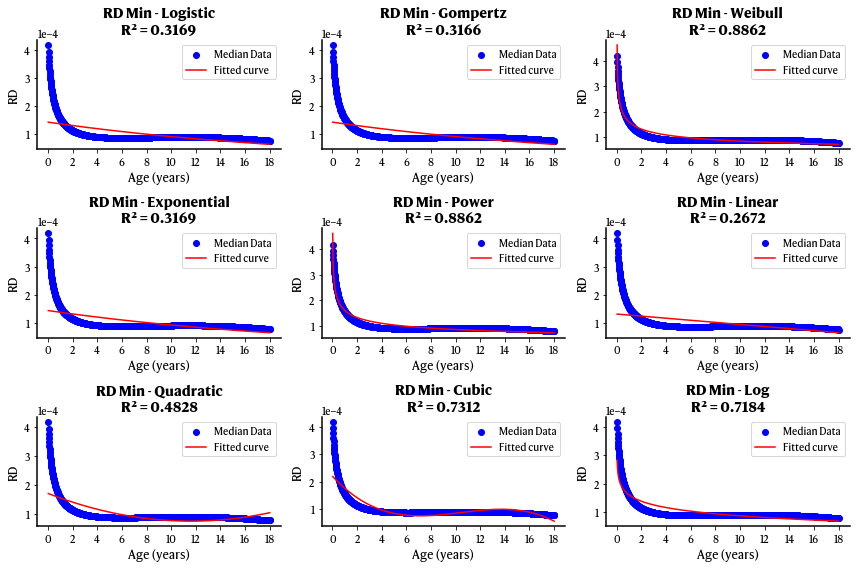

In [16]:
# Same thing for RD min.
# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
# Fit and plot for each function only on md metric (6 functions, 6 subplots
functions = [logistic_func, gompertz_func, weibull_func, exponential_func, power_func, linear_func, quadratic_func, cubic_func, log_func]
function_names = ["Logistic", "Gompertz", "Weibull", "Exponential", "Power", "Linear", "Quadratic", "Cubic", "Log"]
rd_min_params = {}
rd_min_r2 = {}
for i, func in enumerate(functions):
    params, r2 = fit_and_plot(func, rd_min_xdata, rd_min_ydata, ax[i//3, i%3], f"RD Min - {function_names[i]}", "RD")
    rd_min_params[function_names[i]] = params
    rd_min_r2[function_names[i]] = r2

plt.tight_layout()
plt.savefig(ROOT_DIR + "Priors/RD_Min_curve_approximation.png", dpi=300)

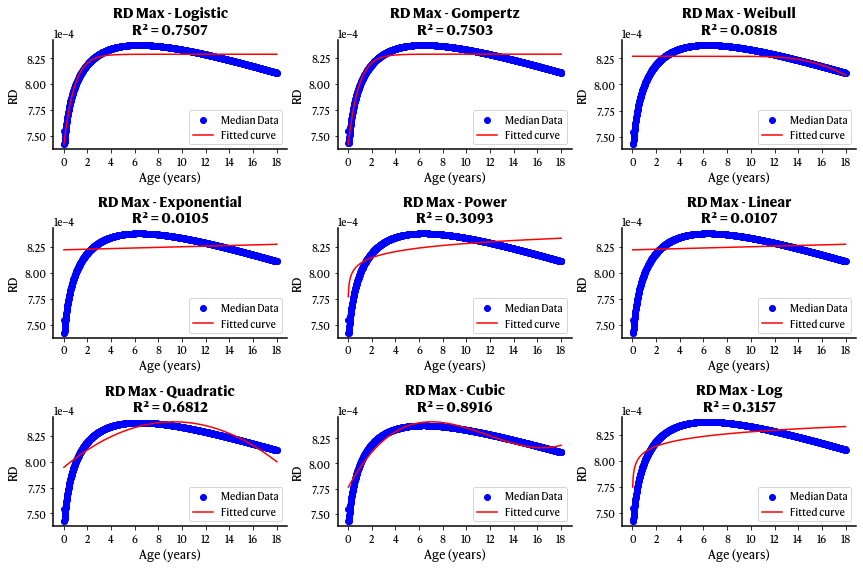

In [17]:
# Same thing for RD max.
# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
# Fit and plot for each function only on md metric (6 functions, 6 subplots
functions = [logistic_func, gompertz_func, weibull_func, exponential_func, power_func, linear_func, quadratic_func, cubic_func, log_func]
function_names = ["Logistic", "Gompertz", "Weibull", "Exponential", "Power", "Linear", "Quadratic", "Cubic", "Log"]
rd_max_params = {}
rd_max_r2 = {}
for i, func in enumerate(functions):
    params, r2 = fit_and_plot(func, rd_max_xdata, rd_max_ydata, ax[i//3, i%3], f"RD Max - {function_names[i]}", "RD")
    rd_max_params[function_names[i]] = params
    rd_max_r2[function_names[i]] = r2
plt.tight_layout()
plt.savefig(ROOT_DIR + "Priors/RD_Max_curve_approximation.png", dpi=300)

In [22]:
# For each metric, print the equation of the function with the highest R^2 (write in a nice format for a paper)
def print_best_fit(metric, params_dict, r2_dict):
    best_func = max(r2_dict, key=r2_dict.get)
    best_params = params_dict[best_func]
    best_r2 = r2_dict[best_func]
    
    if best_func == "Logistic":
        equation = f"{metric} = {best_params[0]:.6f} / (1 + exp(-{best_params[1]:.6f} * (age - {best_params[2]:.6f})))"
    elif best_func == "Gompertz":
        equation = f"{metric} = {best_params[0]:.6f} * exp(-{best_params[1]:.6f} * exp(-{best_params[2]:.6f} * age))"
    elif best_func == "Weibull":
        equation = f"{metric} = {best_params[0]:.6f} * (1 - exp(-({best_params[1]:.6f} * age)^{best_params[2]:.6f}))"
    elif best_func == "Exponential":
        equation = f"{metric} = {best_params[0]:.6f} * exp({best_params[1]:.6f} * age)"
    elif best_func == "Power":
        equation = f"{metric} = {best_params[0]:.6f} * age^{best_params[1]:.6f}"
    elif best_func == "Linear":
        equation = f"{metric} = {best_params[0]:.6f} * age + {best_params[1]:.6f}"
    elif best_func == "Quadratic":
        equation = f"{metric} = {best_params[0]:.6f} * age^2 + {best_params[1]:.6f} * age + {best_params[2]:.6f}"
    elif best_func == "Cubic":
        equation = f"{metric} = {best_params[0]:.6f} * age^3 + {best_params[1]:.6f} * age^2 + {best_params[2]:.6f} * age + {best_params[3]:.6f}"
    elif best_func == "Log":
        equation = f"{metric} = {best_params[0]:.6f} * log(age) + {best_params[1]:.6f}"

    print(equation)

print_best_fit("FA", fa_params, fa_r2)
print_best_fit("AD", ad_params, ad_r2)
print_best_fit("RD", rd_params, rd_r2)
print_best_fit("MD", md_params, md_r2)
print_best_fit("RD Min", rd_min_params, rd_min_r2)
print_best_fit("RD Max", rd_max_params, rd_max_r2)

FA = 0.753921 * exp(-0.117887 * exp(-1.487588 * age))
AD = 0.001819 * age^-0.047225
RD = 0.000432 * age^-0.094887
MD = 0.004195 * (1 - exp(-(12799.312945 * age)^0.014698))
RD Min = 0.000159 * age^-0.276126
RD Max = 0.000000 * age^3 + -0.000002 * age^2 + 0.000022 * age + 0.000776


#### **Computing the *sharpness* of our derived fiber response function**

In [234]:
# Load back the GAMLSS centile data and plot them with the original data.
fa_centiles = pd.read_csv(RESULTS_DIR + "fa_1fiber_centiles_by_age.csv")
ad_centiles = pd.read_csv(RESULTS_DIR + "ad_1fiber_centiles_by_age.csv")
rd_centiles = pd.read_csv(RESULTS_DIR + "rd_1fiber_centiles_by_age.csv")
md_centiles = pd.read_csv(RESULTS_DIR + "md_ventricle_centiles_by_age.csv")

# For each values in the prob column, create a column prob_value so that the resulting df is in the wide format
# with columns age, P3, P10, P25, P50, P75, P90, P97 (all PX columns contain metric values for the corresponding percentiles).
fa_centiles = fa_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
ad_centiles = ad_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
rd_centiles = rd_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
md_centiles = md_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
rd_centiles.drop(0, axis=0, inplace=True)  # Drop the first row which contains NA values.

In [235]:
# Combine the ad and rd centile plots into a single dataframe.
combined_centiles = pd.merge(ad_centiles, rd_centiles, on="age", suffixes=('_ad', '_rd'))
combined_centiles.drop([0, 1], axis=0, inplace=True)  # Drop first two rows with NA values.

# Compute the sharpness factor.
def sharpness(x):
    return ((x["0.5_ad"] + x["0.5_rd"] + x["0.5_rd"]) / 3) * 10000

combined_centiles['sharpness'] = combined_centiles.apply(sharpness, axis=1)

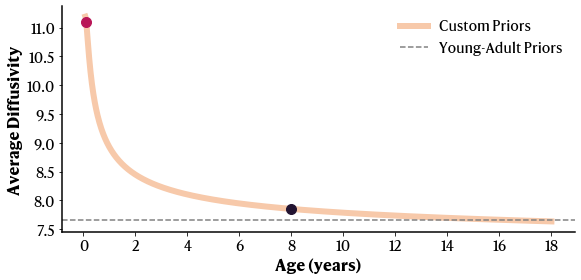

In [241]:
# Plot a lineplot of sharpness vs age
cmap = sns.color_palette("rocket_r", n_colors=10)
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(data=combined_centiles, x="age", y="sharpness", color=cmap[0], ax=ax, linewidth=6, label="Custom Priors")
ax.axhline((15 + 4 + 4) / 3, color="grey", linewidth=1.5, linestyle='--', label="Young-Adult Priors")
#ax.set_title("Sharpness of Diffusion Metrics vs Age", fontsize=16, fontweight='bold')
ax.set_xlabel("Age (years)", fontsize=16, fontweight='bold')
ax.set_ylabel("Average Diffusivity", fontsize=16, fontweight='bold')
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax.tick_params(axis='both', which='major', labelsize=14)
# Add a single point at 1 month with the corresponding sharpness value
ax.scatter(0.093, 11.09, color=cmap[5], s=100, zorder=3)
ax.scatter(8, 7.85, color=cmap[9], s=100, zorder=3)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.legend(fontsize=14, frameon=False)
plt.tight_layout()
plt.savefig(RESULTS_DIR + "sharpness_vs_age.png", dpi=300, bbox_inches='tight', facecolor='white')

#### **Investigating the before/after priors in the BCP cohort**

The next few cells will investigate how the inclusion of age-adaptable priors affect an association with
language scores.

In [335]:
# We have a bunch of tsv for each participant. Let's combine them into a single dataframe for easier plotting.
directory = ROOT_DIR + "PriorsEffect/"

nopriors_file = os.listdir(directory + "tsv_nopriors/")

# For each of those files, we need to remove the sub-234553__ pattern part of the column names.
def clean_column_names(df):
    df.columns = df.columns.str.replace(r"^sub-[^_]+__", "", regex=True)
    return df

# Loop through each file, and concat them into a single df.
all_nopriors = pd.concat([clean_column_names(pd.read_csv(directory + "tsv_nopriors/" + file, sep="\t")) for file in nopriors_file], ignore_index=True)

withpriors_file = os.listdir(directory + "tsv_withpriors/")

all_withpriors = pd.concat([pd.read_csv(directory + "tsv_withpriors/" + file, sep="\t") for file in withpriors_file], ignore_index=True)

In [336]:
# Load the mullen scale data
mullen_data = pd.read_csv(ROOT_DIR + "BCP/mullen03.txt", sep="\t")

# Let's select the relevant columns and merge with the Mullen data.
mullen_df = mullen_data[['src_subject_id', 'interview_age', 'sex', 'scl4_rl_raw_score', 'scl5_el_raw_score', 'scoresumm_rl_t_score', 'scoresumm_el_t_score']]
mullen_df.rename(columns={'src_subject_id': 'sample', 'interview_age': 'session', 'scl4_rl_raw_score': 'raw_receptive_language', 'scl5_el_raw_score': 'raw_expressive_language',
                            'scoresumm_rl_t_score': 'receptive_language', 'scoresumm_el_t_score': 'expressive_language'}, inplace=True)

# Make sure the sample columns contains 6 digits by padding with leading zeros. then append with sub-
mullen_df['sample'] = mullen_df['sample'].apply(lambda x: str(x).zfill(6))
mullen_df['sample'] = 'sub-' + mullen_df['sample']

# Duplicate the session column to create a age column.
mullen_df['age'] = mullen_df['session']

# For the session column, append ses- at the start and mo at the end
mullen_df['session'] = mullen_df['session'].apply(lambda x: 'ses-' + str(x) + 'mo')
mullen_df.drop(0, axis=0, inplace=True)  # Drop first row with NA values.

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_35124/1008530388.py:2: DtypeWarning: Columns (0,1,2,4,6,7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,25

In [337]:
# Create a AF_L/AF_R dataframe for both with and without priors
# We need to match each mullen entry with the closest age in months from the all_nopriors and all_withpriors dataframes.

# Prepare dataframes
af_l_nopriors = all_nopriors[all_nopriors['bundle'] == 'AF_L'].copy()
af_r_nopriors = all_nopriors[all_nopriors['bundle'] == 'AF_R'].copy()
af_l_withpriors = all_withpriors[all_withpriors['bundle'] == 'AF_L'].copy()
af_r_withpriors = all_withpriors[all_withpriors['bundle'] == 'AF_R'].copy()

# Extract age in months from session column
for df in [af_l_nopriors, af_r_nopriors, af_l_withpriors, af_r_withpriors]:
    df['age_months'] = df['session'].str.extract(r'ses-(\d+)mo')[0].astype(float)

mullen_df_prepared = mullen_df.copy()
mullen_df_prepared['age_months'] = mullen_df_prepared['session'].str.extract(r'ses-(\d+)mo')[0].astype(float)

# Function to merge with closest age match per subject
def merge_closest_age_manual(bundle_df, assessment_data, tolerance_months=6):
    """
    Merge bundle data with assessment data, matching each assessment entry to the closest 
    same subject in the bundle dataframe by age using manual nearest neighbor search.
    
    Parameters:
    -----------
    bundle_df : DataFrame with 'sample', 'session', 'age_months' columns
    assessment_data : DataFrame with 'sample', 'session', 'age_months' columns
    tolerance_months : int, maximum allowed age difference in months (default 6)
    
    Returns:
    --------
    DataFrame with matched records including 'age_diff_months' column
    """
    # Clean data
    bundle_clean = bundle_df.dropna(subset=['sample', 'age_months']).copy()
    assessment_clean = assessment_data.dropna(subset=['sample', 'age_months']).copy()
    
    matched_rows = []
    
    # For each assessment entry, find the closest match in bundle data
    for _, assessment_row in assessment_clean.iterrows():
        sample = assessment_row['sample']
        assessment_age = assessment_row['age_months']
        
        # Get all bundle entries for this subject
        subject_bundles = bundle_clean[bundle_clean['sample'] == sample]
        
        if len(subject_bundles) == 0:
            continue
        
        # Calculate age difference for each bundle entry
        subject_bundles = subject_bundles.copy()
        subject_bundles['age_diff'] = (subject_bundles['age_months'] - assessment_age).abs()
        
        # Find the closest match
        closest_match = subject_bundles.loc[subject_bundles['age_diff'].idxmin()]
        
        # Check if within tolerance
        if closest_match['age_diff'] <= tolerance_months:
            # Merge the rows
            merged_row = closest_match.to_dict()
            # Add assessment data (excluding sample and age_months which are already there)
            for col in assessment_clean.columns:
                if col not in ['sample', 'age_months']:
                    merged_row[col] = assessment_row[col]
            # Keep the age difference as 'age_diff_months' for tracking
            merged_row['age_diff_months'] = closest_match['age_diff']
            matched_rows.append(merged_row)
    
    # Create merged dataframe
    if len(matched_rows) > 0:
        merged = pd.DataFrame(matched_rows)
        merged.drop(columns=['age_diff', 'age_months'], inplace=True, errors='ignore')
        return merged
    else:
        # Return empty dataframe with combined columns
        return pd.DataFrame()

# Merge with closest age match (tolerance of 6 months)
af_l_nopriors = merge_closest_age_manual(af_l_nopriors, mullen_df_prepared, tolerance_months=0)
af_r_nopriors = merge_closest_age_manual(af_r_nopriors, mullen_df_prepared, tolerance_months=0)
af_l_withpriors = merge_closest_age_manual(af_l_withpriors, mullen_df_prepared, tolerance_months=0)
af_r_withpriors = merge_closest_age_manual(af_r_withpriors, mullen_df_prepared, tolerance_months=0)

# loop to convert to numeric and remove duplicates.
for df in [af_l_nopriors, af_r_nopriors, af_l_withpriors, af_r_withpriors]:
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['raw_receptive_language'] = pd.to_numeric(df['raw_receptive_language'], errors='coerce')
    df['raw_expressive_language'] = pd.to_numeric(df['raw_expressive_language'], errors='coerce')
    df['receptive_language'] = pd.to_numeric(df['receptive_language'], errors='coerce')
    df['expressive_language'] = pd.to_numeric(df['expressive_language'], errors='coerce')
    # Drop rows where values are 999
    df.replace(999, np.nan, inplace=True)
    # Encode sex as M == 1 and F == 2
    df['sex'] = df['sex'].map({'M': 1, 'F': 2})
    df.drop_duplicates(subset=['sample', 'session'], inplace=True)
    df.dropna(inplace=True)

In [338]:
# Create a function to compute a multivariate linear regression
def fit_multivariate_lr(df, predictors, response):
    X = df[predictors]
    y = df[response]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    return model

In [339]:
# Loop through all combinations and fit the models
predictor_vars = ['afd_fixel', 'age', 'sex']
response_vars = ['raw_receptive_language', 'raw_expressive_language', 'receptive_language', 'expressive_language']

results_mullen = {}
for af_df, label in zip([af_l_nopriors, af_r_nopriors, af_l_withpriors, af_r_withpriors],
                        ['af_l_nopriors', 'af_r_nopriors', 'af_l_withpriors', 'af_r_withpriors']):
    for response in response_vars:
        model = fit_multivariate_lr(af_df, predictor_vars, response)
        results_mullen[(label, response)] = model

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_35124/757802612.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


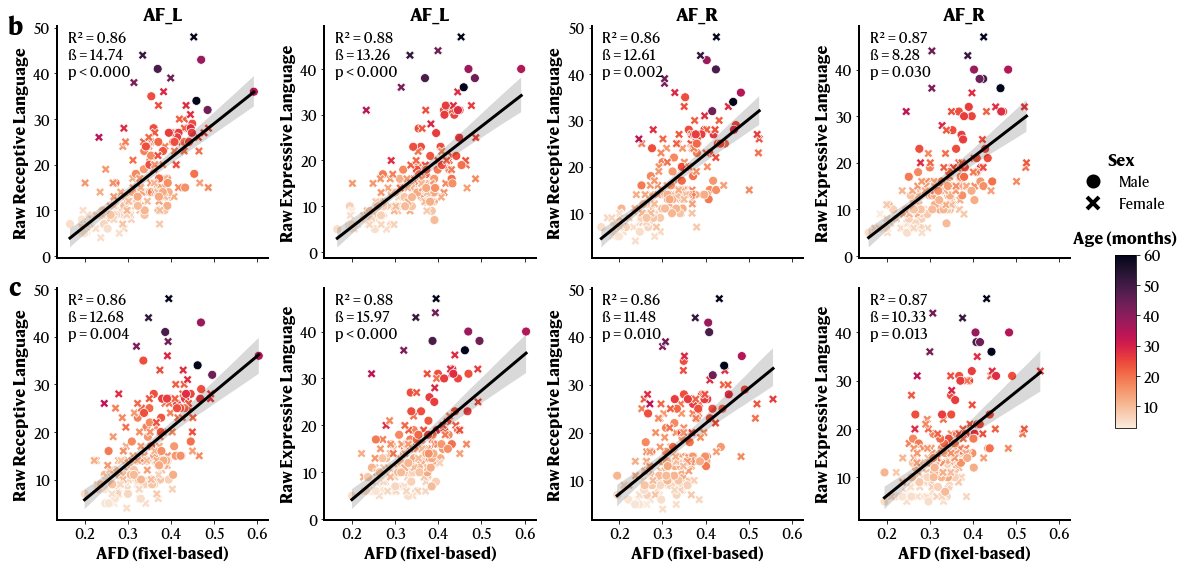

In [340]:
# Plot results.
vars_to_plot = ['raw_receptive_language', 'raw_expressive_language']
bundle_order = ['AF_L', 'AF_L', 'AF_R', 'AF_R']

fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=False)
for i, response in enumerate(['nopriors', 'withpriors']):
    if response == 'nopriors':
        df_list = [af_l_nopriors, af_l_nopriors, af_r_nopriors, af_r_nopriors]
        label_order = ['af_l_nopriors', 'af_l_nopriors', 'af_r_nopriors', 'af_r_nopriors']
    else:
        df_list = [af_l_withpriors, af_l_withpriors, af_r_withpriors, af_r_withpriors]
        label_order = ['af_l_withpriors', 'af_l_withpriors', 'af_r_withpriors', 'af_r_withpriors']
    for y, (p, df, label) in enumerate(zip(vars_to_plot * 2, df_list, label_order)):
        sns.scatterplot(data=df, x='afd_fixel', y=p, hue='age', style='sex', palette='rocket_r', ax=axes[i][y], s=80, legend=False)
        sns.regplot(data=df, x='afd_fixel', y=p, ax=axes[i][y], scatter=False, color='black', line_kws={'linewidth': 3})
        axes[i][y].set_xlabel("AFD (fixel-based)", fontsize=16, fontweight='bold')
        axes[i][y].set_ylabel(p.replace('_', ' ').title(), fontsize=16, fontweight='bold')
        axes[i][y].tick_params(axis='both', which='major', labelsize=14)
        axes[i][y].spines[['top', 'right']].set_visible(False)
        axes[i][y].spines[["left", "bottom"]].set_linewidth(2)
        if i == 0:
            axes[i][y].set_title(f"{bundle_order[y]}", fontsize=18, fontweight='bold')
        # Add text box with the regression results
        model = results_mullen[(label, p)]
        r2 = model.rsquared
        coef_afd = model.params['afd_fixel']
        pval_afd = model.pvalues['afd_fixel']
        axes[i][y].text(0.05, 0.98, f"R² = {r2:.2f}\nß = {coef_afd:.2f}\np {'<' if pval_afd < 0.001 else '='} {pval_afd:.3f}", transform=axes[i][y].transAxes, fontsize=14, verticalalignment='top')

# Let's do a global legend that includes
handles_sex = [plt.Line2D([0], [0], color="black", markersize=12, lw=0, marker="o", markeredgewidth=2, markeredgecolor='black'),
               plt.Line2D([0], [0], color="black", markersize=12, lw=0, marker="x", markeredgewidth=4, markeredgecolor='black')]
labels_sex = ["Male", "Female"]
fig.legend(handles_sex, labels_sex, loc="upper left", bbox_to_anchor=(0.985, 0.75), ncol=1, fontsize=14, title="Sex", title_fontproperties={'size': 16, 'weight': 'bold'}, frameon=False)
# Age colorbar
scm = plt.cm.ScalarMappable(cmap="rocket_r", norm=plt.Normalize(vmin=af_l_nopriors['age'].min(), vmax=af_l_nopriors['age'].max()))
scm.set_array([])
cax = fig.add_axes([1.03, 0.25, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(scm, cax=cax, orientation='vertical', fraction=0.01, pad=0.2, use_gridspec=True)
cbar.ax.tick_params(labelsize=14)
cbar.ax.text(0.5, 1.05, 'Age (months)', fontsize=16, fontweight='bold', ha='center', va='bottom', transform=cbar.ax.transAxes)

# Add a b and c labels to each row (on the left side)
axes[0][0].text(-0.2, 1, 'b', transform=axes[0][0].transAxes, fontsize=24, fontweight='bold', va='center', ha='center')
axes[1][0].text(-0.2, 1, 'c', transform=axes[1][0].transAxes, fontsize=24, fontweight='bold', va='center', ha='center')

plt.tight_layout()
plt.savefig(directory + "AFD_language_scores_comparison_AF_LR.png", dpi=300, bbox_inches='tight', facecolor='white')

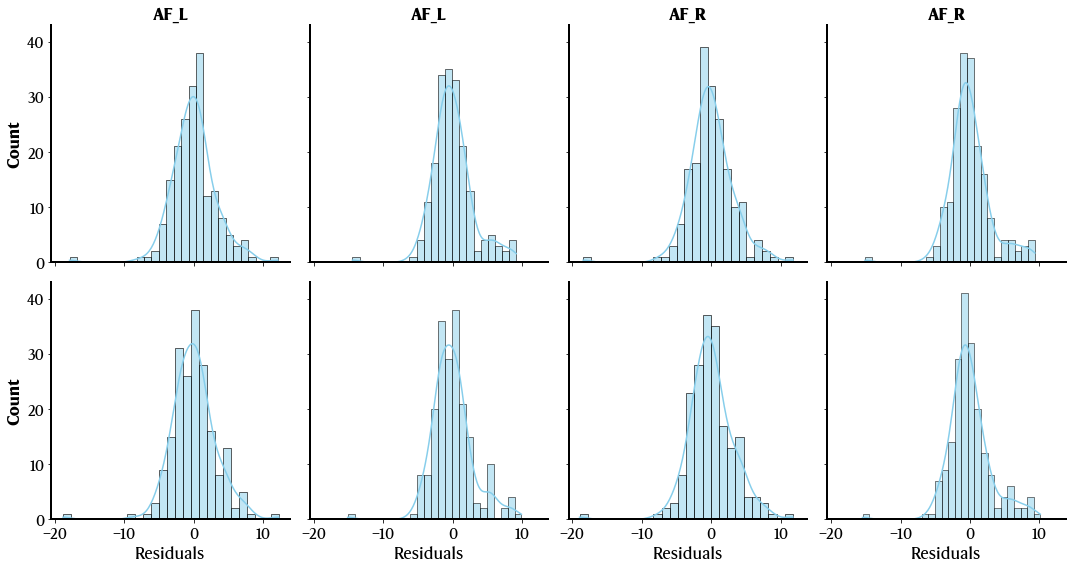

In [341]:
# Quickly plot the residuals for each model
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=True)
for i, response in enumerate(['nopriors', 'withpriors']):
    if response == 'nopriors':
        df_list = [af_l_nopriors, af_l_nopriors, af_r_nopriors, af_r_nopriors]
        label_order = ['af_l_nopriors', 'af_l_nopriors', 'af_r_nopriors', 'af_r_nopriors']
    else:
        df_list = [af_l_withpriors, af_l_withpriors, af_r_withpriors, af_r_withpriors]
        label_order = ['af_l_withpriors', 'af_l_withpriors', 'af_r_withpriors', 'af_r_withpriors']
    for y, (p, df, label) in enumerate(zip(vars_to_plot * 2, df_list, label_order)):
        model = results_mullen[(label, p)]
        residuals = model.resid
        sns.histplot(residuals, kde=True, ax=axes[i][y], color='skyblue')
        axes[i][y].set_xlabel("Residuals", fontsize=16)
        axes[i][y].set_ylabel("Count", fontsize=16, fontweight='bold')
        axes[i][y].tick_params(axis='both', which='major', labelsize=14)
        axes[i][y].spines[['top', 'right']].set_visible(False)
        axes[i][y].spines[["left", "bottom"]].set_linewidth(2)
        if i == 0:
            axes[i][y].set_title(f"{bundle_order[y]}", fontsize=16, fontweight='bold')
plt.tight_layout()

In [351]:
# save all results into individual CSVs.
for model in results_mullen.items():
    p, var = model[0]
    summary_df = model[1].summary2().tables[0]
    summary_df = pd.concat([summary_df, model[1].summary2().tables[1]])
    summary_df.to_csv(directory + f"multiple_regression_mullen_{p}_{var}.csv")

In [352]:
# Load the cbcl data
cbcl_data = pd.read_csv(ROOT_DIR + "BCP/cbcl1_501.txt", sep="\t")

# Let's select the relevant columns and merge with the Mullen data.
cbcl_df = cbcl_data[['src_subject_id', 'interview_age', 'sex', 'cbcl_total_raw', 'cbcl_total', 'cbcl_internal_raw', 'cbcl_external_raw']]
cbcl_df.rename(columns={'src_subject_id': 'sample', 'interview_age': 'session', 'cbcl_total_raw': 'CBCL_total_problems_raw', 'cbcl_total': 'CBCL_total_problems',
                        'cbcl_internal_raw': 'CBCL_Internalization', 'cbcl_external_raw': 'CBCL_Externalization'}, inplace=True)

# Make sure the sample columns contains 6 digits by padding with leading zeros. then append with sub-
cbcl_df['sample'] = cbcl_df['sample'].apply(lambda x: str(x).zfill(6))
cbcl_df['sample'] = 'sub-' + cbcl_df['sample']

# Duplicate the session column to create a age column.
cbcl_df['age'] = cbcl_df['session']

# For the session column, append ses- at the start and mo at the end
cbcl_df['session'] = cbcl_df['session'].apply(lambda x: 'ses-' + str(x) + 'mo')
cbcl_df.drop(0, axis=0, inplace=True)  # Drop first row with NA values.

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_35124/3289355822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbcl_df.rename(columns={'src_subject_id': 'sample', 'interview_age': 'session', 'cbcl_total_raw': 'CBCL_total_problems_raw', 'cbcl_total': 'CBCL_total_problems',
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_35124/3289355822.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbcl_df['sample'] = cbcl_df['sample'].apply(lambda x: str(x).zfill(6))
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_35124/3289355822.py:

In [353]:
# Create a ILF_L/ILF_R dataframe for both with and without priors
# We need to match each cbcl entry with the closest age in months from the all_nopriors and all_withpriors dataframes (using the session column).

# Prepare dataframes
slf_l_nopriors = all_nopriors[all_nopriors['bundle'] == 'SLF_L'].copy()
slf_r_nopriors = all_nopriors[all_nopriors['bundle'] == 'SLF_R'].copy()
slf_l_withpriors = all_withpriors[all_withpriors['bundle'] == 'SLF_L'].copy()
slf_r_withpriors = all_withpriors[all_withpriors['bundle'] == 'SLF_R'].copy()

# Extract age in months from session column
for df in [slf_l_nopriors, slf_r_nopriors, slf_l_withpriors, slf_r_withpriors]:
    df['age_months'] = df['session'].str.extract(r'ses-(\d+)mo')[0].astype(float)

cbcl_df_prepared = cbcl_df.copy()
cbcl_df_prepared['age_months'] = cbcl_df_prepared['session'].str.extract(r'ses-(\d+)mo')[0].astype(float)

# Alternative approach: manual nearest neighbor matching
def merge_closest_age_manual(bundle_df, cbcl_data, tolerance_months=6):
    """
    Merge bundle data with CBCL data, matching each CBCL entry to the closest 
    same subject in the bundle dataframe by age using manual nearest neighbor search.
    
    Parameters:
    -----------
    bundle_df : DataFrame with 'sample', 'session', 'age_months' columns
    cbcl_data : DataFrame with 'sample', 'session', 'age_months' columns
    tolerance_months : int, maximum allowed age difference in months (default 6)
    
    Returns:
    --------
    DataFrame with matched records including 'age_diff_months' column
    """
    # Clean data
    bundle_clean = bundle_df.dropna(subset=['sample', 'age_months']).copy()
    cbcl_clean = cbcl_data.dropna(subset=['sample', 'age_months']).copy()
    
    matched_rows = []
    
    # For each CBCL entry, find the closest match in bundle data
    for _, cbcl_row in cbcl_clean.iterrows():
        sample = cbcl_row['sample']
        cbcl_age = cbcl_row['age_months']
        
        # Get all bundle entries for this subject
        subject_bundles = bundle_clean[bundle_clean['sample'] == sample]
        
        if len(subject_bundles) == 0:
            continue
        
        # Calculate age difference for each bundle entry
        subject_bundles = subject_bundles.copy()
        subject_bundles['age_diff'] = (subject_bundles['age_months'] - cbcl_age).abs()
        
        # Find the closest match
        closest_match = subject_bundles.loc[subject_bundles['age_diff'].idxmin()]
        
        # Check if within tolerance
        if closest_match['age_diff'] <= tolerance_months:
            # Merge the rows
            merged_row = closest_match.to_dict()
            # Add CBCL data (excluding sample and age_months which are already there)
            for col in cbcl_clean.columns:
                if col not in ['sample', 'age_months']:
                    merged_row[col] = cbcl_row[col]
            # Keep the age difference as 'age_diff_months' for tracking
            merged_row['age_diff_months'] = closest_match['age_diff']
            matched_rows.append(merged_row)
    
    # Create merged dataframe
    if len(matched_rows) > 0:
        merged = pd.DataFrame(matched_rows)
        merged.drop(columns=['age_diff', 'age_months'], inplace=True, errors='ignore')
        return merged
    else:
        # Return empty dataframe with combined columns
        return pd.DataFrame()

# Merge with closest age match (tolerance of 6 months)
slf_l_nopriors = merge_closest_age_manual(slf_l_nopriors, cbcl_df_prepared, tolerance_months=6)
slf_r_nopriors = merge_closest_age_manual(slf_r_nopriors, cbcl_df_prepared, tolerance_months=6)
slf_l_withpriors = merge_closest_age_manual(slf_l_withpriors, cbcl_df_prepared, tolerance_months=6)
slf_r_withpriors = merge_closest_age_manual(slf_r_withpriors, cbcl_df_prepared, tolerance_months=6)

# loop to convert to numeric and remove duplicates.
for df in [slf_l_nopriors, slf_r_nopriors, slf_l_withpriors, slf_r_withpriors]:
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['CBCL_total_problems_raw'] = pd.to_numeric(df['CBCL_total_problems_raw'], errors='coerce')
    df['CBCL_total_problems'] = pd.to_numeric(df['CBCL_total_problems'], errors='coerce')
    df['CBCL_Internalization'] = pd.to_numeric(df['CBCL_Internalization'], errors='coerce')
    df['CBCL_Externalization'] = pd.to_numeric(df['CBCL_Externalization'], errors='coerce')
    # Drop rows where values are 999
    df.replace(999, np.nan, inplace=True)
    # Encode sex as M == 1 and F == 2
    df['sex'] = df['sex'].map({'M': 1, 'F': 2})
    df.drop_duplicates(subset=['sample', 'session'], inplace=True)
    df.dropna(inplace=True)

In [354]:
# Loop through all combinations and fit the models
predictor_vars = ['afd_fixel', 'age', 'sex']
response_vars = ['CBCL_total_problems', 'CBCL_total_problems', 'CBCL_Internalization', 'CBCL_Externalization']

results_cbcl = {}
for df, label in zip([slf_l_nopriors, slf_r_nopriors, slf_l_withpriors, slf_r_withpriors],
                        ['slf_l_nopriors', 'slf_r_nopriors', 'slf_l_withpriors', 'slf_r_withpriors']):
    for response in response_vars:
        model = fit_multivariate_lr(df, predictor_vars, response)
        results_cbcl[(label, response)] = model

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_35124/3420059956.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


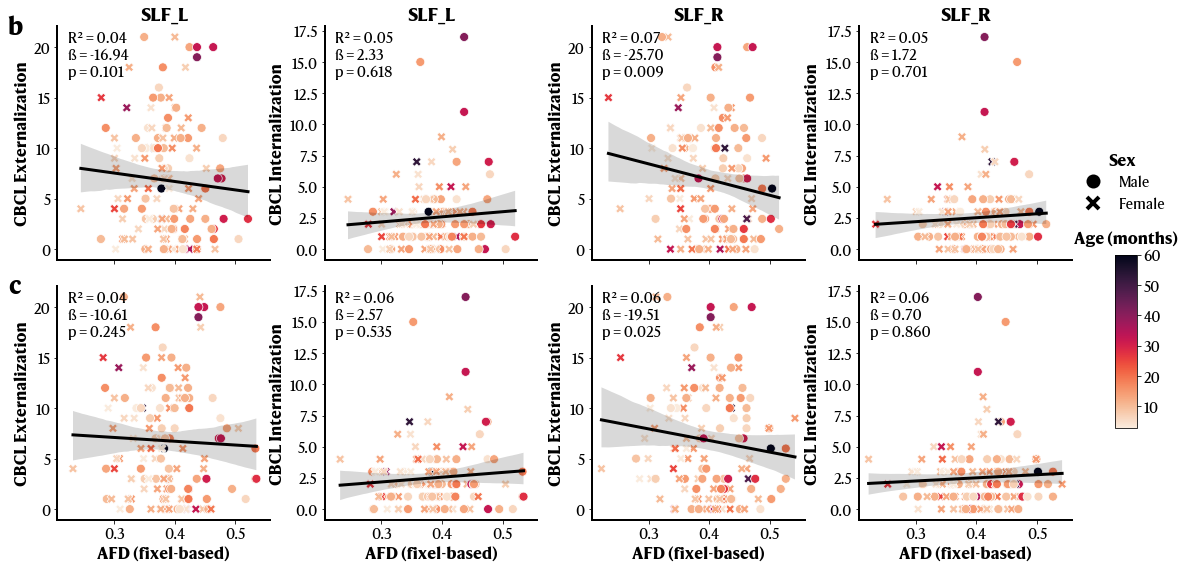

In [355]:
# Plot results.
vars_to_plot = ['CBCL_Externalization', 'CBCL_Internalization']
bundle_order = ['SLF_L', 'SLF_L', 'SLF_R', 'SLF_R']

fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=False)
for i, response in enumerate(['nopriors', 'withpriors']):
    if response == 'nopriors':
        df_list = [slf_l_nopriors, slf_l_nopriors, slf_r_nopriors, slf_r_nopriors]
        label_order = ['slf_l_nopriors', 'slf_l_nopriors', 'slf_r_nopriors', 'slf_r_nopriors']
    else:
        df_list = [slf_l_withpriors, slf_l_withpriors, slf_r_withpriors, slf_r_withpriors]
        label_order = ['slf_l_withpriors', 'slf_l_withpriors', 'slf_r_withpriors', 'slf_r_withpriors']
    for y, (p, df, label) in enumerate(zip(vars_to_plot * 2, df_list, label_order)):
        sns.scatterplot(data=df, x='afd_fixel', y=p, hue='age', style='sex', palette='rocket_r', ax=axes[i][y], s=80, legend=False)
        sns.regplot(data=df, x='afd_fixel', y=p, ax=axes[i][y], scatter=False, color='black', line_kws={'linewidth': 3})
        axes[i][y].set_xlabel("AFD (fixel-based)", fontsize=16, fontweight='bold')
        axes[i][y].set_ylabel(p.replace('_', ' '), fontsize=16, fontweight='bold')
        axes[i][y].tick_params(axis='both', which='major', labelsize=14)
        axes[i][y].spines[['top', 'right']].set_visible(False)
        axes[i][y].spines[["left", "bottom"]].set_linewidth(2)
        if i == 0:
            axes[i][y].set_title(f"{bundle_order[y]}", fontsize=18, fontweight='bold')
        # Add text box with the regression results
        model = results_cbcl[(label, p)]
        r2 = model.rsquared
        coef_afd = model.params['afd_fixel']
        pval_afd = model.pvalues['afd_fixel']
        axes[i][y].text(0.05, 0.98, f"R² = {r2:.2f}\nß = {coef_afd:.2f}\np {'<' if pval_afd < 0.001 else '='} {pval_afd:.3f}", transform=axes[i][y].transAxes, fontsize=14, verticalalignment='top')

# Let's do a global legend that includes
handles_sex = [plt.Line2D([0], [0], color="black", markersize=12, lw=0, marker="o", markeredgewidth=2, markeredgecolor='black'),
               plt.Line2D([0], [0], color="black", markersize=12, lw=0, marker="x", markeredgewidth=4, markeredgecolor='black')]
labels_sex = ["Male", "Female"]
fig.legend(handles_sex, labels_sex, loc="upper left", bbox_to_anchor=(0.985, 0.75), ncol=1, fontsize=14, title="Sex", title_fontproperties={'size': 16, 'weight': 'bold'}, frameon=False)
# Age colorbar
scm = plt.cm.ScalarMappable(cmap="rocket_r", norm=plt.Normalize(vmin=af_l_nopriors['age'].min(), vmax=af_l_nopriors['age'].max()))
scm.set_array([])
cax = fig.add_axes([1.03, 0.25, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(scm, cax=cax, orientation='vertical', fraction=0.01, pad=0.2, use_gridspec=True)
cbar.ax.tick_params(labelsize=14)
cbar.ax.text(0.5, 1.05, 'Age (months)', fontsize=16, fontweight='bold', ha='center', va='bottom', transform=cbar.ax.transAxes)

# Add a b and c labels to each row (on the left side)
axes[0][0].text(-0.2, 1, 'b', transform=axes[0][0].transAxes, fontsize=24, fontweight='bold', va='center', ha='center')
axes[1][0].text(-0.2, 1, 'c', transform=axes[1][0].transAxes, fontsize=24, fontweight='bold', va='center', ha='center')

plt.tight_layout()
plt.savefig(directory + "AFD_cbcl_scores_comparison_SLF_LR.png", dpi=300, bbox_inches='tight', facecolor='white')

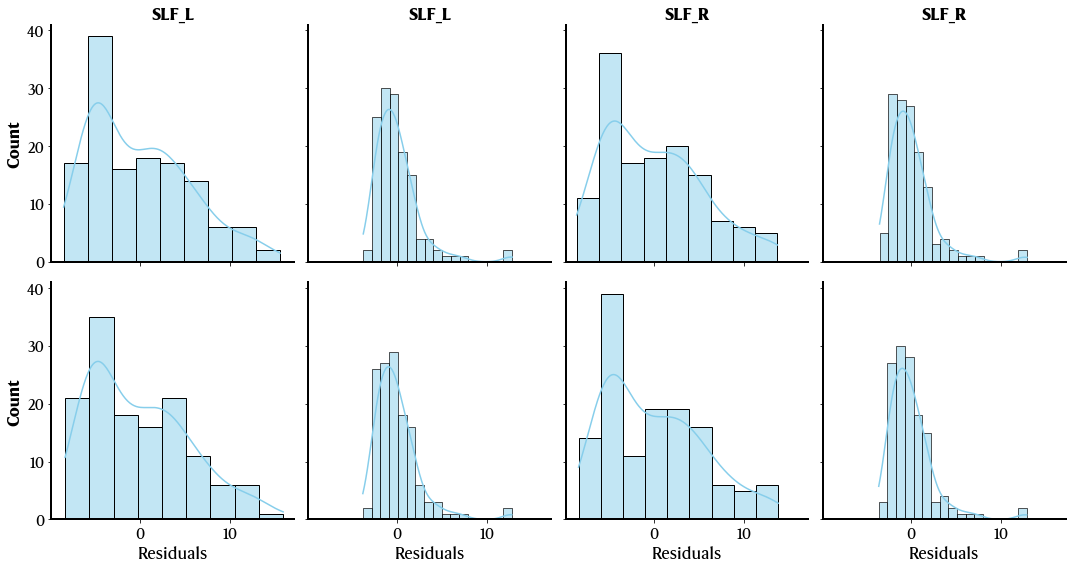

In [356]:
# Quickly plot the residuals for each model
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=True)
for i, response in enumerate(['nopriors', 'withpriors']):
    if response == 'nopriors':
        df_list = [slf_l_nopriors, slf_l_nopriors, slf_r_nopriors, slf_r_nopriors]
        label_order = ['slf_l_nopriors', 'slf_l_nopriors', 'slf_r_nopriors', 'slf_r_nopriors']
    else:
        df_list = [slf_l_withpriors, slf_l_withpriors, slf_r_withpriors, slf_r_withpriors]
        label_order = ['slf_l_withpriors', 'slf_l_withpriors', 'slf_r_withpriors', 'slf_r_withpriors']
    for y, (p, df, label) in enumerate(zip(vars_to_plot * 2, df_list, label_order)):
        model = results_cbcl[(label, p)]
        residuals = model.resid
        sns.histplot(residuals, kde=True, ax=axes[i][y], color='skyblue')
        axes[i][y].set_xlabel("Residuals", fontsize=16)
        axes[i][y].set_ylabel("Count", fontsize=16, fontweight='bold')
        axes[i][y].tick_params(axis='both', which='major', labelsize=14)
        axes[i][y].spines[['top', 'right']].set_visible(False)
        axes[i][y].spines[["left", "bottom"]].set_linewidth(2)
        if i == 0:
            axes[i][y].set_title(f"{bundle_order[y]}", fontsize=16, fontweight='bold')
plt.tight_layout()

In [357]:
# save all results into individual CSVs.
for model in results_cbcl.items():
    p, var = model[0]
    summary_df = model[1].summary2().tables[0]
    summary_df = pd.concat([summary_df, model[1].summary2().tables[1]])
    summary_df.to_csv(directory + f"multiple_regression_cbcl_{p}_{var}.csv")

# **Look at the DICE score in the test-retest MASiVar data**

We ran the bundling profile both using the young-adult priors and the age-adaptable priors. Then, for each
test-retest, we computed the dice score for the left/right corticospinal tract. This is the comparison of the dice scores
between the two conditions.

In [4]:
data_nopriors = f"{ROOT_DIR}/MASiVar/DiceNoPriors/"
data_withpriors = f"{ROOT_DIR}/MASiVar/DiceWithPriors/"

# Those folders contain JSON files, from which we need to extract the dice scores for each bundle.
# The dice is under the key "dice_voxels" and "w_dice_voxels" for weighted dice.
import json

def extract_dice_scores(directory):
    dice_files = os.listdir(directory)
    all_dice = []
    for file in dice_files:
        if file.endswith(".json"):
            with open(os.path.join(directory, file), 'r') as f:
                data = json.load(f)
                sub_id = file.split('_')[0]
                session_id = file.split('_')[1]
                # Get the hemisphere from the filename (hemi-left or hemi-right)
                hemisphere = file.split('_')[4]
                dice_score = data['dice_voxels'][0]
                weighted_dice_score = data['w_dice_voxels'][0]
                all_dice.append({'sub_id': sub_id, 'session_id': session_id, 'hemisphere': hemisphere, 'dice_score': dice_score, 'weighted_dice_score': weighted_dice_score})
    return pd.DataFrame(all_dice).sort_values(by=['sub_id', 'session_id', 'hemisphere'])

dice_nopriors_df = extract_dice_scores(data_nopriors)
dice_withpriors_df = extract_dice_scores(data_withpriors)

In [5]:
# Merge both dataframes on sub_id, session_id, and hemisphere
dice_nopriors_df.rename(columns={'dice_score': 'dice_nopriors', 'weighted_dice_score': 'weighted_dice_nopriors'}, inplace=True)
dice_withpriors_df.rename(columns={'dice_score': 'dice_withpriors', 'weighted_dice_score': 'weighted_dice_withpriors'}, inplace=True)

combined_dice_df = pd.merge(dice_nopriors_df, dice_withpriors_df, on=['sub_id', 'session_id', 'hemisphere'])

combined_dice_df

,sub_id,session_id,hemisphere,dice_nopriors,weighted_dice_nopriors,dice_withpriors,weighted_dice_withpriors
0,sub-cIVs001,test1,hemi-left,0.811540,0.989128,0.794566,0.984824
1,sub-cIVs001,test1,hemi-right,0.847665,0.994620,0.791451,0.983830
2,sub-cIVs001,test2,hemi-left,0.767006,0.980679,0.723509,0.964133
3,sub-cIVs001,test2,hemi-right,0.844796,0.993801,0.806580,0.986296
4,sub-cIVs002,test1,hemi-left,0.849711,0.995198,0.818499,0.991598
...,...,...,...,...,...,...,...
221,sub-cIVs104,test1,hemi-right,0.817538,0.990423,0.815702,0.988953
222,sub-cIVs108,test1,hemi-left,0.806712,0.988603,0.785309,0.985088
223,sub-cIVs108,test1,hemi-right,0.809790,0.984937,0.843790,0.992225
224,sub-cIVs109,test1,hemi-left,0.819442,0.985674,0.878076,0.996694


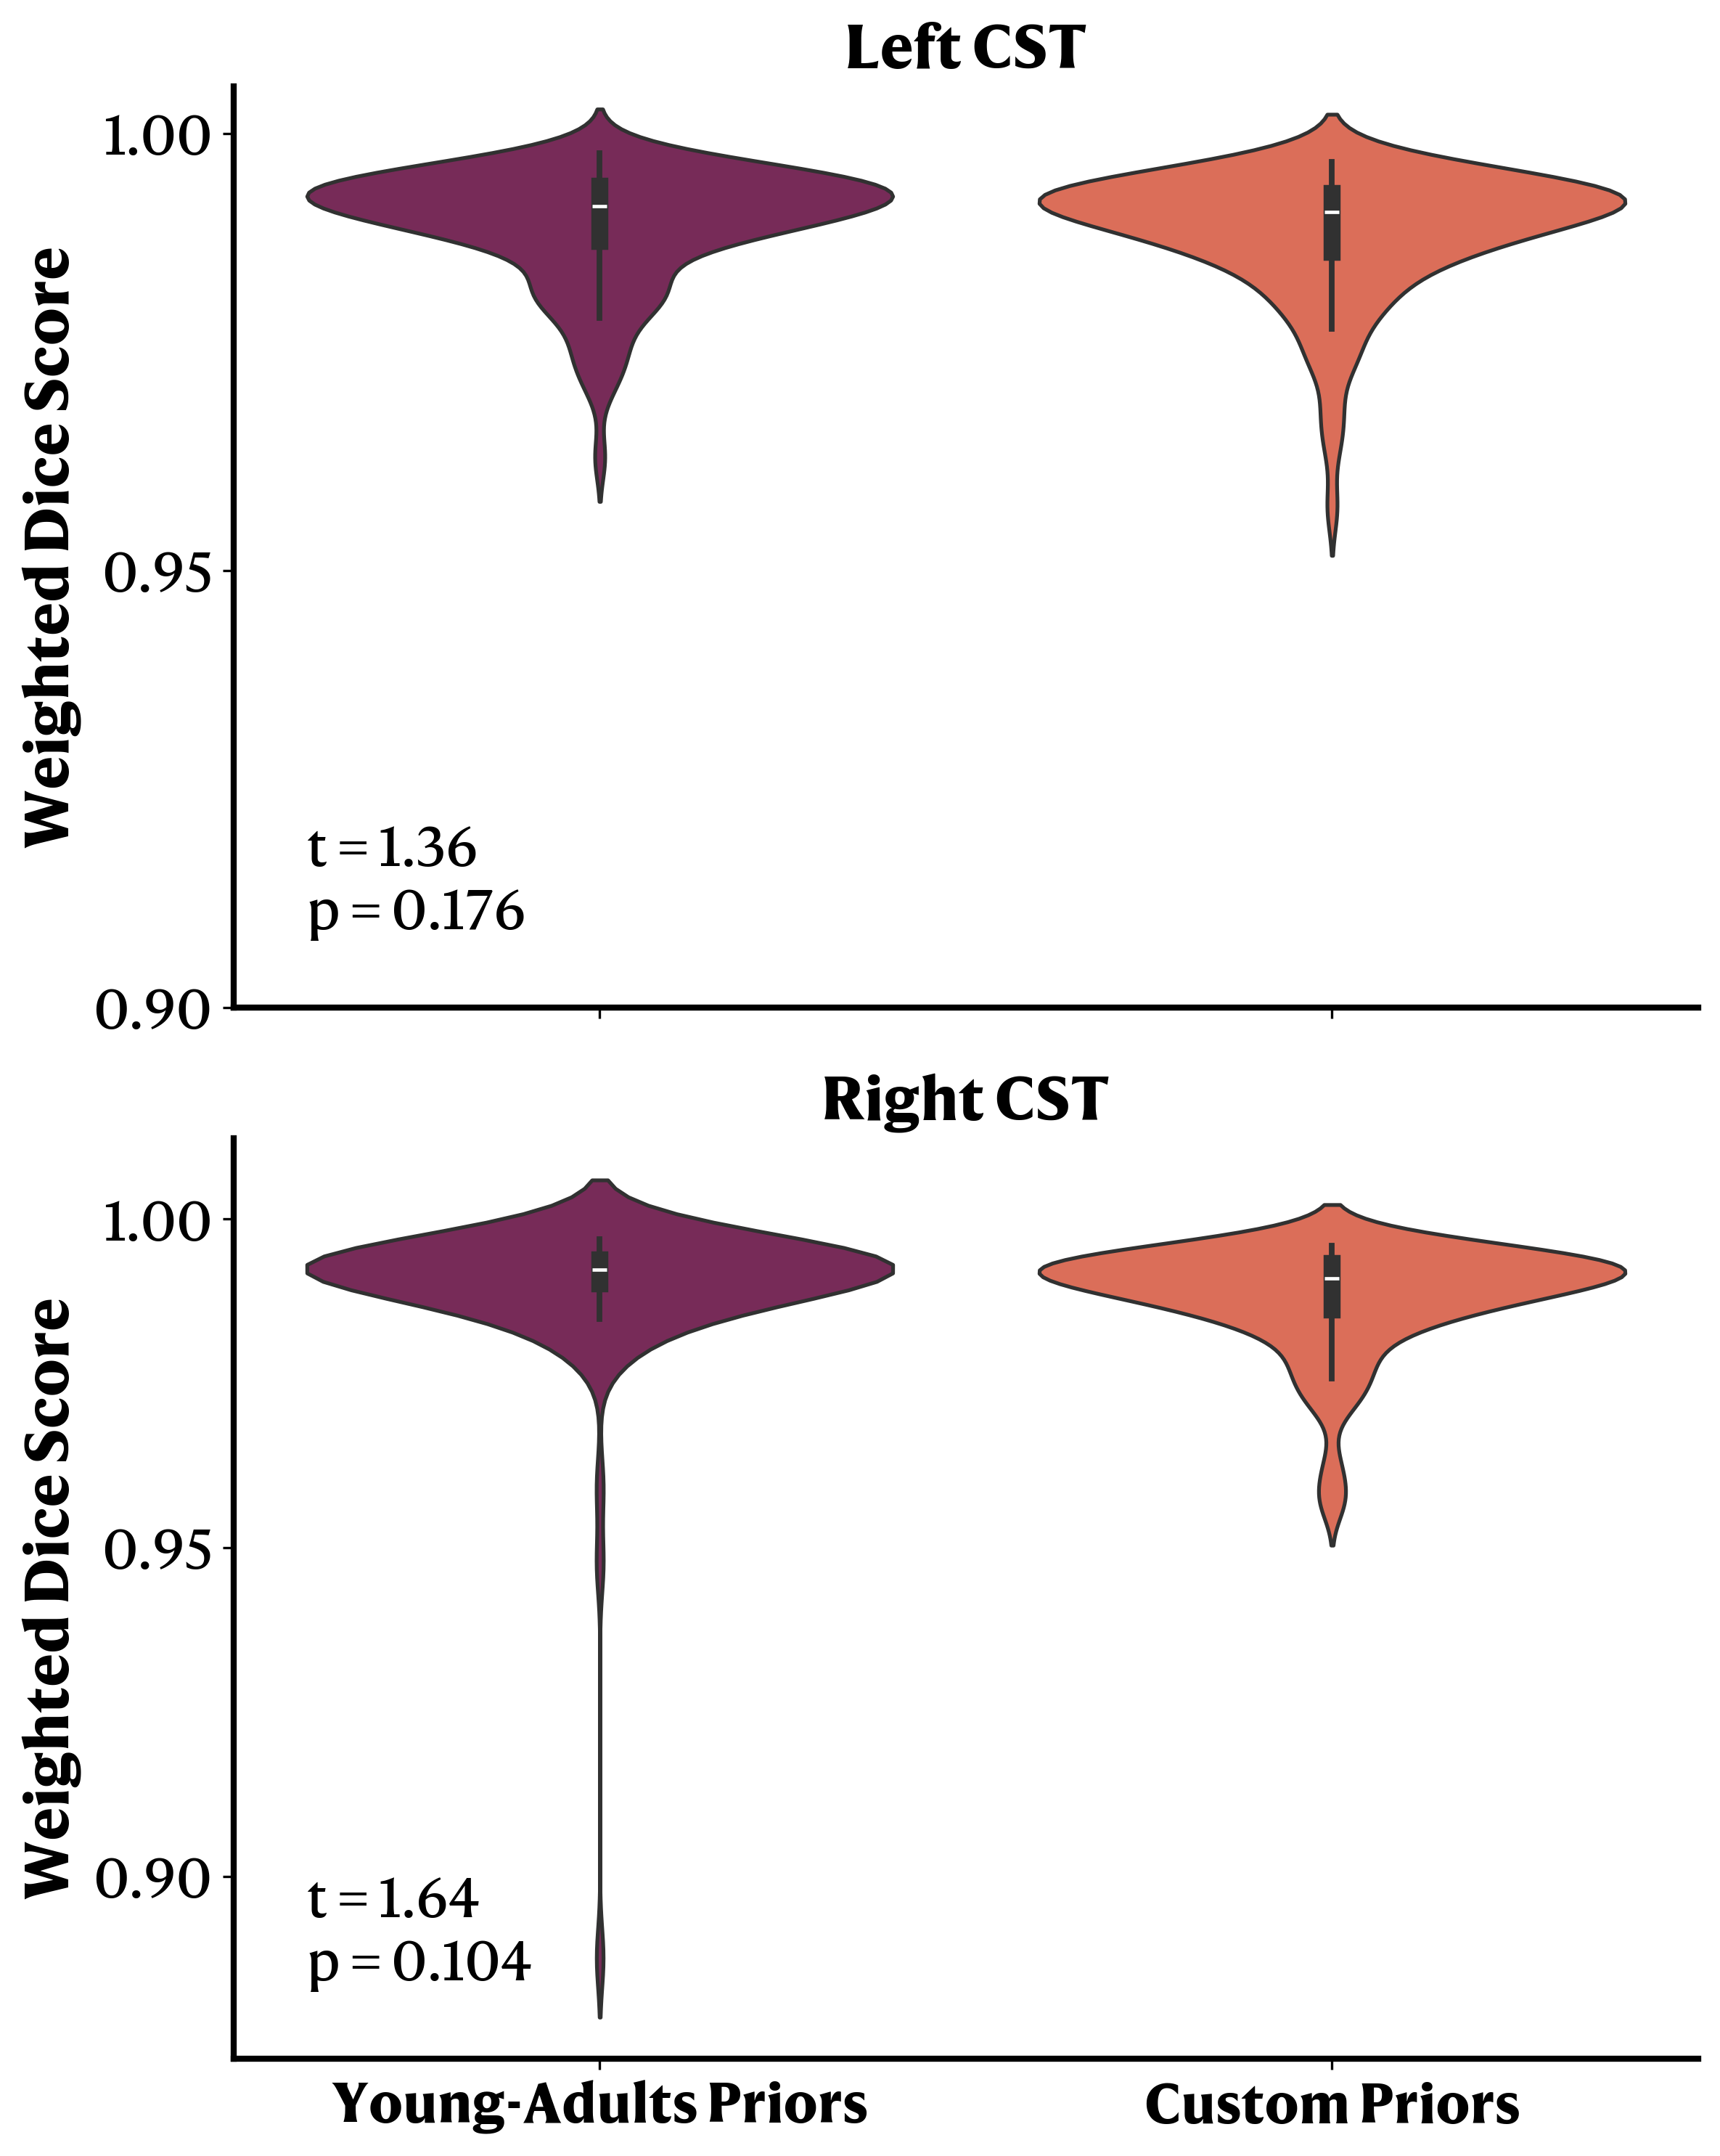

In [6]:
# Let's do a violin plot to compare the distributions of the dice score metric before and after adding priors.
# Split into left and right CST for plotting.
from scipy.stats import ttest_rel
left_df = combined_dice_df[combined_dice_df['hemisphere'] == 'hemi-left']
right_df = combined_dice_df[combined_dice_df['hemisphere'] == 'hemi-right']

fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharex=True, sharey=False, dpi=300)
sns.violinplot(data=pd.melt(left_df, id_vars=['sub_id', 'session_id', 'hemisphere'], value_vars=['weighted_dice_nopriors', 'weighted_dice_withpriors']),
               x='variable', y='value', palette='rocket', hue='variable', legend=False,
               ax=ax[0])
ax[0].set_ylabel('Weighted Dice Score', fontdict={'size': 20, 'weight': 'bold'})
ax[0].set_xlabel('')
ax[0].set_yticks(np.arange(0.90, 1.01, 0.05), [f"{i:.2f}" for i in np.arange(0.90, 1.01, 0.05)], fontdict={'size': 18})
ax[0].set_xticks([0, 1], ['Young-Adults Priors', 'Custom Priors'], fontdict={'size': 18, 'weight': 'bold'})
ax[0].set_title('Left CST', fontdict={'size': 20, 'weight': 'bold'})

# Let's add the one-sided t-test result to the plot.
t_stat, p_value = ttest_rel(left_df['weighted_dice_nopriors'], left_df['weighted_dice_withpriors'], nan_policy='omit',
                            alternative='two-sided')
# Place the text on the top left of the plot.
ax[0].text(0.05, 0.20,
         f't = {t_stat:.2f}\np = {0.001 if p_value < 0.001 else f"{p_value:.3f}"}', 
         ha='left', va='top', fontsize=18, transform=ax[0].transAxes)
ax[0].spines[["left", "bottom"]].set_linewidth(2)
ax[0].spines[["top", "right"]].set_visible(False)

sns.violinplot(data=pd.melt(right_df, id_vars=['sub_id', 'session_id', 'hemisphere'], value_vars=['weighted_dice_nopriors', 'weighted_dice_withpriors']),
               x='variable', y='value', palette='rocket', hue='variable', legend=False,
               ax=ax[1])
ax[1].set_ylabel('Weighted Dice Score', fontdict={'size': 20, 'weight': 'bold'})
ax[1].set_xlabel('')
ax[1].set_xticks([0, 1], ['Young-Adults Priors', 'Custom Priors'], fontdict={'size': 18, 'weight': 'bold'}, rotation=0)
ax[1].set_yticks(np.arange(0.90, 1.01, 0.05), [f"{i:.2f}" for i in np.arange(0.90, 1.01, 0.05)], fontdict={'size': 18})
ax[1].set_title('Right CST', fontdict={'size': 20, 'weight': 'bold'})

# Let's add the one-sided t-test result to the plot.
t_stat, p_value = ttest_rel(right_df['weighted_dice_nopriors'], right_df['weighted_dice_withpriors'], nan_policy='omit',
                            alternative='two-sided')
ax[1].text(0.05, 0.20,
         f't = {t_stat:.2f}\np = {0.001 if p_value < 0.001 else f"{p_value:.3f}"}', 
         ha='left', va='top', fontsize=18, transform=ax[1].transAxes)

# Spines
ax[1].spines[["left", "bottom"]].set_linewidth(2)
ax[1].spines[["top", "right"]].set_visible(False)

plt.tight_layout()
plt.savefig(RESULTS_DIR + 'dice_score_violin_plot.png', dpi=300, facecolor="white")
plt.show()